In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'

C:\Users\user\AppData\Local\Temp\ipykernel_13168\1880915521.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# poi 차원축소

In [2]:
poi = pd.read_csv('POI_500미터.csv')
# poi

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=21)
pca_array = pca.fit_transform(poi)
pca_df = pd.DataFrame(pca_array, index=poi.index, columns=[f'pca{num+1}' for num in range(poi.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21
0,-46.436555,7.925637,6.485296,-4.062677,-5.001956,-0.291331,-1.049031,2.251077,1.366086,-4.077122,...,-0.840659,5.086528,0.617068,-3.352732,-1.115432,0.210562,0.528928,-0.193457,-0.141987,-0.183894
1,-47.104592,9.411792,5.336473,-4.069326,-4.370987,0.016876,-0.854152,2.636940,0.995046,-3.614098,...,-1.515389,5.648361,0.495077,-3.594653,-0.889998,0.158434,0.567680,-0.118996,-0.125501,-0.192255
2,-47.144520,9.533115,5.346178,-4.120043,-4.355113,0.189944,-0.988251,2.502725,0.501979,-2.964530,...,-1.855783,5.636355,0.352348,-3.488096,-0.713831,0.078255,0.562764,-0.083558,-0.073828,-0.185830
3,-47.144520,9.533115,5.346178,-4.120043,-4.355113,0.189944,-0.988251,2.502725,0.501979,-2.964530,...,-1.855783,5.636355,0.352348,-3.488096,-0.713831,0.078255,0.562764,-0.083558,-0.073828,-0.185830
4,-47.144520,9.533115,5.346178,-4.120043,-4.355113,0.189944,-0.988251,2.502725,0.501979,-2.964530,...,-1.855783,5.636355,0.352348,-3.488096,-0.713831,0.078255,0.562764,-0.083558,-0.073828,-0.185830


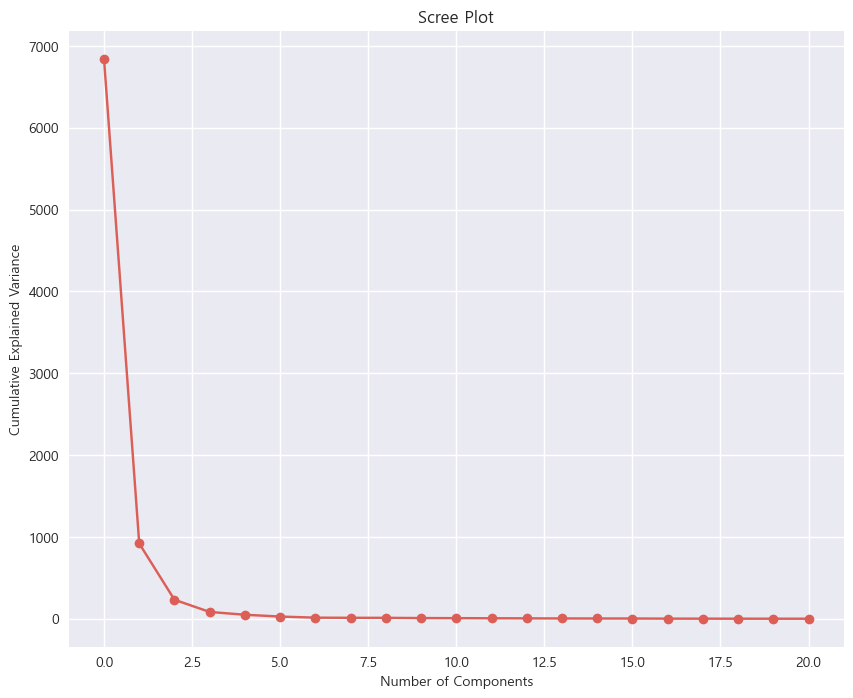

In [4]:
# Scree Plot
plt.figure(figsize=(10,8))
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_, 'o-')

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_array = pca.fit_transform(poi)
poi['poi 특성 1'] = pca_array[:, 0]
poi['poi 특성 2'] = pca_array[:, 1]
poi['poi 특성 3'] = pca_array[:, 2]
# poi.head(3)

In [6]:
poi = poi.loc[:,['poi 특성 1', 'poi 특성 2', 'poi 특성 3']]
poi

,poi 특성 1,poi 특성 2,poi 특성 3
0,-46.436555,7.925637,6.485296
1,-47.104592,9.411792,5.336473
2,-47.144520,9.533115,5.346178
3,-47.144520,9.533115,5.346178
4,-47.144520,9.533115,5.346178
...,...,...,...
6244,-73.579438,18.252871,-0.842518
6245,-69.418330,8.560118,8.050353
6246,-48.046827,-12.838266,0.025731
6247,-73.946345,20.146819,1.460693


In [7]:
sample = pd.read_csv('./데이터/최종 샘플파일_전기추가_검수최종.csv', encoding='cp949')
# sample

In [8]:
df = pd.concat([sample, poi], axis=1)
# df

# 데이터 전처리

In [9]:
# 빈집 추정에 도움되지 않은 열 제거
# 빈집밀집도 제거
df.drop(['주소', '주소1', '주소2', '주소3', '주소4', '주소 최종', '주소 동 최종', '위도', '경도', 
         '건축물대장', '건축승인일자', '건축승인년도', '허가일', '빈집밀집도'], axis=1, inplace=True)
# df

In [10]:
# 현재 연도에서 사용승인 날짜의 연도 빼기
from datetime import datetime

today = 2020

accept = []
for i in range(df.shape[0]):
    try:
        accept.append(today - float(df['사용승인일'][i][:4]))
    except:
        accept.append(df['사용승인일'][i])
df['사용승인일'] = accept
# df

In [11]:
df['사용승인일'].describe()

count    4321.000000
mean       31.468410
std        65.073769
min     -1771.000000
25%        15.000000
50%        32.000000
75%        42.000000
max       119.000000
Name: 사용승인일, dtype: float64

In [12]:
# 사용승인일이 0 이하인 데이터 추출
df[df['사용승인일']<0].index

Int64Index([836, 1978, 2055, 2335, 5228], dtype='int64')

In [13]:
df.loc[df.사용승인일 < 0, '사용승인일'] = np.nan

In [14]:
df['사용승인일'].describe()

count    4316.000000
mean       33.543559
std        22.737001
min         0.000000
25%        15.000000
50%        32.000000
75%        42.000000
max       119.000000
Name: 사용승인일, dtype: float64

# 결측값 처리

In [15]:
df.describe()

,빈집여부,상수도_6개월_위험,상수도_12개월_확정,전기 사용량 최종,대지면적,건축면적,연면적,세대수,가구수,지상층수,...,남자인구,여자인구,외국인남자인구,외국인여자인구,65세이상인구,65세이상인구비율,기초생활수급자비율,poi 특성 1,poi 특성 2,poi 특성 3
count,6249.000000,3946.000000,3946.000000,4901.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,...,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6.249000e+03,6.249000e+03,6.249000e+03
mean,0.389342,207.460466,433.603142,8393.367476,210.570028,182.411557,396.975331,3.316825,2.688035,2.146957,...,6262.270050,5945.380823,192.908916,107.060989,2075.728350,0.260282,0.071962,2.328679e-15,1.164340e-15,1.455424e-16
std,0.487640,2017.499022,4017.249015,24822.037018,305.367972,727.385556,1066.480110,15.702171,4.297757,1.593657,...,6841.783078,6811.295545,327.203187,119.341893,1070.111652,0.104657,0.029899,8.273508e+01,3.032434e+01,1.523280e+01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1176.000000,1069.000000,5.000000,11.000000,784.000000,0.089055,0.030253,-7.405490e+01,-9.894145e+01,-5.022812e+01
25%,0.000000,20.000000,46.000000,0.000000,0.000000,59.600000,80.850000,0.000000,1.000000,1.000000,...,1670.000000,1557.000000,23.000000,19.000000,1158.000000,0.182538,0.053823,-7.193741e+01,-2.305242e+01,-4.974635e+00
50%,0.000000,65.000000,143.000000,2829.000000,186.200000,92.160000,124.630000,0.000000,1.000000,1.000000,...,2819.000000,2937.000000,64.000000,37.000000,2020.000000,0.271353,0.062816,-2.630151e+01,8.930521e+00,1.486087e+00
75%,1.000000,135.000000,287.000000,9524.000000,314.200000,131.580000,398.280000,0.000000,1.000000,3.000000,...,6751.000000,6453.000000,189.000000,184.000000,2429.000000,0.354775,0.091878,4.506705e+01,1.750432e+01,5.392077e+00
max,1.000000,86736.000000,171147.000000,680493.000000,7140.000000,16114.700000,24320.490000,410.000000,42.000000,15.000000,...,27766.000000,28031.000000,1168.000000,389.000000,4969.000000,0.414254,0.193742,2.565577e+02,1.066438e+02,7.546941e+01


In [16]:
def missing_df(df):
    mc = pd.DataFrame(df.isnull().sum(), columns=["Missing Count"])
    mc = mc[mc['Missing Count']!=0] #불리언 인덱싱
    #새로운 컬럼 추가
    mc['Missing %'] = (mc['Missing Count'] / df.shape[0]) * 100
    return mc.sort_values('Missing %',ascending=False)

In [17]:
missing_df(df)

,Missing Count,Missing %
상수도_6개월_위험,2303,36.853897
상수도_12개월_확정,2303,36.853897
주택 가격,2129,34.069451
사용승인일,1933,30.932949
주지붕,1928,30.852936
지하층수,1928,30.852936
가구수,1928,30.852936
세대수,1928,30.852936
기타지붕,1928,30.852936
지상층수,1928,30.852936


In [19]:
df = df[df['상수도_6개월_위험'].notna()]
df = df[df['주택 가격'].notna()]
df = df[df['사용승인일'].notna()]
df = df[df['주지붕'].notna()]
df = df[df['전기 사용량 최종'].notna()]
# df

In [20]:
df.isna().sum().sum()

0

## 범주형 변수 인코딩

In [21]:
# 범주형 변수 값 개수 확인
print('주구조:', df['주구조'].nunique())
print('기타구조:', df['기타구조'].nunique())
print('주용도:', df['주용도'].nunique())
print('기타용도:', df['기타용도'].nunique())
print('주지붕:', df['주지붕'].nunique())
print('기타지붕:', df['기타지붕'].nunique())

주구조: 12
기타구조: 219
주용도: 2
기타용도: 102
주지붕: 5
기타지붕: 190


In [22]:
# 범주가 너무 많은 것들은 제거
df.drop(['기타구조', '기타용도', '기타지붕'], axis=1, inplace=True)
# df

In [23]:
# 주_구조, 주_용도, 주_지붕 one hot encoding
df = pd.get_dummies(df, columns=['주구조', '주용도', '주지붕'])
# df

In [24]:
df.isna().sum().sum()

0

In [25]:
df['빈집여부'].value_counts()

0    2365
1     531
Name: 빈집여부, dtype: int64

In [26]:
# 빈집 아님 비율
len(df[df['빈집여부']==0])/len(df['빈집여부'])

0.8166436464088398

In [27]:
# 빈집 비율
len(df[df['빈집여부']==1])/len(df['빈집여부'])

0.18335635359116023

# 상관관계

In [28]:
# 빈집여부가 target 변수
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams["figure.figsize"] = (45,30)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# plt.rc('font', size=18) 
# sns.heatmap(data=df.corr(), annot=True,
#            fmt = '.2f', linewidths=.6, cmap = 'Blues')

# 훈련, 테스트 데이터 세트 분리

In [29]:
x = df.drop(['빈집여부'], axis=1, inplace=False)
y = df['빈집여부']

In [30]:
from sklearn.model_selection import train_test_split
# train, test 분리
X_train_all, X_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.3)

# 검증세트 분할하기
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, stratify=y_train_all, test_size=0.3)
print(len(X_train), len(X_val))

1418 609


In [31]:
# 훈련 데이터, 테스트 데이터에 있는 빈집 데이터 수
print(y_train_all[y_train_all == 1].count())
print(y_test[y_test == 1 ].count())

372
159


In [32]:
def results(X_test, y_test, y_pred, model):    
    from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
    from sklearn import metrics
    from sklearn.metrics import classification_report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred)) 

    fig, ax_arr = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))

    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    ax_arr.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    ax_arr.plot([0, 1], [0, 1],'r--')
    ax_arr.set_title('Receiver Operating Characteristic',fontsize=20)
    ax_arr.set_ylabel('True Positive Rate',fontsize=20)
    ax_arr.set_xlabel('False Positive Rate',fontsize=15)
    ax_arr.legend(loc = 'lower right', prop={'size': 16})

In [33]:
def f_importances(coef, names):
    ftr_importances = pd.Series(coef,index=names)
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    plt.figure(figsize=(8,6))
    plt.title('Feature importances Top 20')
    sns.barplot(x=ftr_top20 , y=ftr_top20.index)
    plt.show()

# 모델 학습

# Decision Tree

In [33]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':['gini','entropy'],
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [8, 12, 18],
    'min_samples_leaf': [8, 16, 20]
}
DT = DecisionTreeClassifier()
DT_cv = GridSearchCV(DT, param_grid = params, cv=5, verbose=1)
DT_cv.fit(X_train_all,y_train_all)

print("tuned hpyerparameters :(best parameters) ",DT_cv.best_params_)
print("accuracy :",DT_cv.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 18}
accuracy : 0.9457386121753938
Wall time: 3.92 s


Confusion Matrix:
[[691  19]
 [ 13 146]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       710
           1       0.88      0.92      0.90       159

    accuracy                           0.96       869
   macro avg       0.93      0.95      0.94       869
weighted avg       0.96      0.96      0.96       869

Wall time: 16 ms


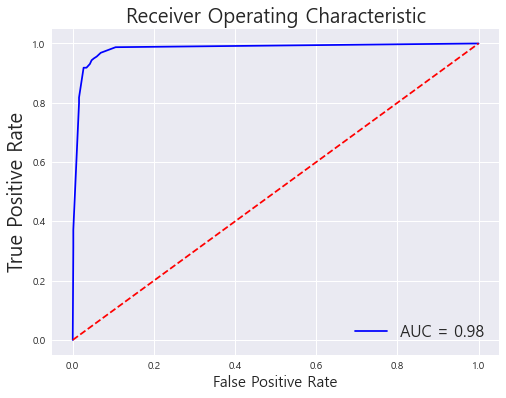

In [34]:
%%time
pred = DT_cv.best_estimator_.predict(X_test)
results(X_test, y_test, pred, DT_cv)

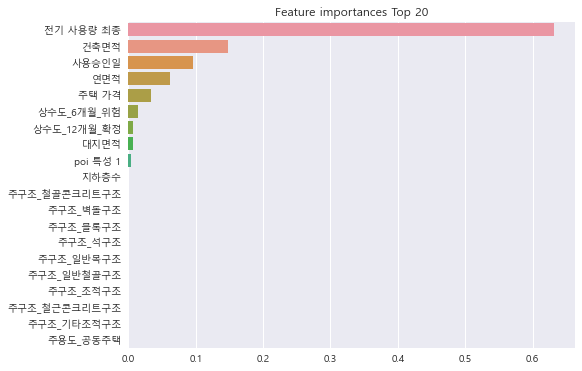

In [35]:
ftr_importances_values = DT_cv.best_estimator_.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

Confusion Matrix:
[[691  19]
 [ 21 138]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       710
           1       0.88      0.87      0.87       159

    accuracy                           0.95       869
   macro avg       0.92      0.92      0.92       869
weighted avg       0.95      0.95      0.95       869

Wall time: 29 ms


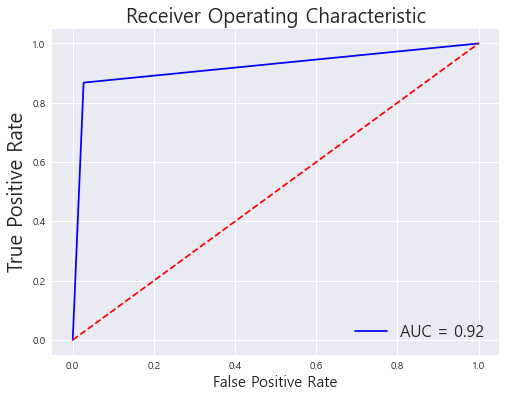

In [36]:
%%time
DT = DecisionTreeClassifier(criterion = "entropy")
DT.fit(X_train_all,y_train_all)
pred1 = DT.predict(X_test)
results(X_test, y_test, pred1, DT)

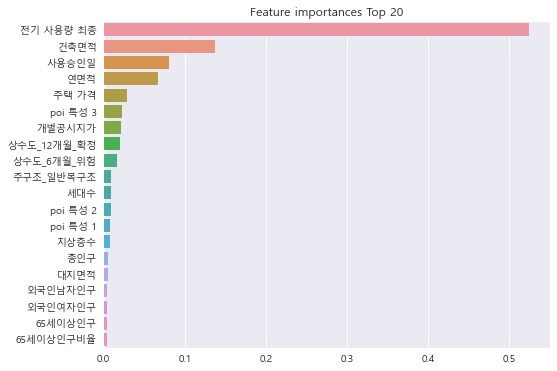

In [37]:
ftr_importances_values = DT.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# Random Forest

In [38]:
%%time
from sklearn.ensemble import RandomForestClassifier
params = {
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [8, 12, 18],
    'min_samples_leaf': [8, 16, 20]
}
RF = RandomForestClassifier()
RF_cv = GridSearchCV(RF, param_grid = params, cv=5, verbose=1)
RF_cv.fit(X_train_all,y_train_all)

print("tuned hpyerparameters :(best parameters) ",RF_cv.best_params_)
print("accuracy :",RF_cv.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
tuned hpyerparameters :(best parameters)  {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 18}
accuracy : 0.9526327312534211
Wall time: 25.6 s


Confusion Matrix:
[[699  11]
 [ 30 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       710
           1       0.92      0.81      0.86       159

    accuracy                           0.95       869
   macro avg       0.94      0.90      0.92       869
weighted avg       0.95      0.95      0.95       869

Wall time: 34.5 ms


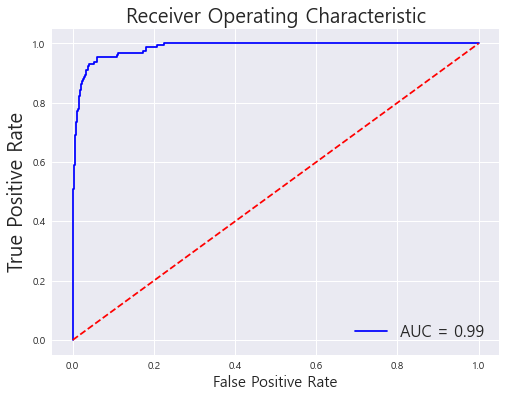

In [39]:
%%time
pred = RF_cv.best_estimator_.predict(X_test)
results(X_test, y_test, pred, RF_cv)

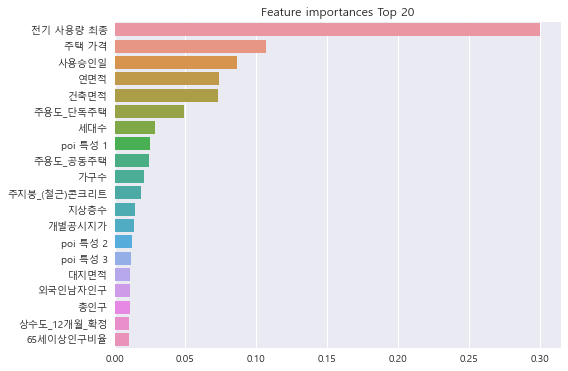

In [40]:
ftr_importances_values = RF_cv.best_estimator_.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

Confusion Matrix:
[[702   8]
 [ 16 143]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       710
           1       0.95      0.90      0.92       159

    accuracy                           0.97       869
   macro avg       0.96      0.94      0.95       869
weighted avg       0.97      0.97      0.97       869

Wall time: 217 ms


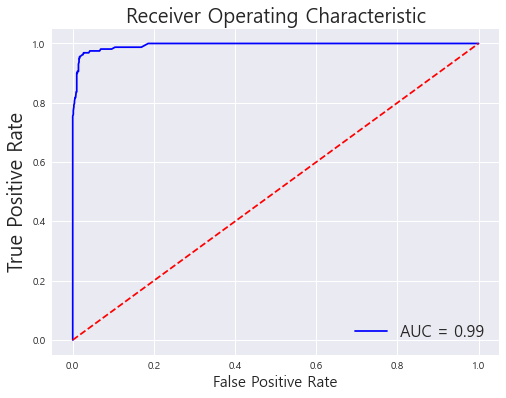

In [41]:
%%time
RF = RandomForestClassifier()
RF.fit(X_train_all, y_train_all)
pred1 = RF.predict(X_test)
results(X_test, y_test, pred1, RF)

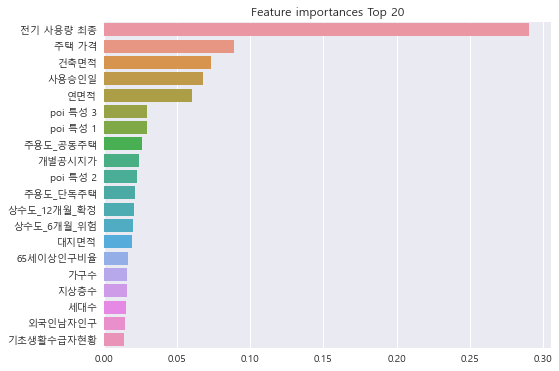

In [42]:
ftr_importances_values = RF.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# Gradient Boosting

In [43]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate' : [0.05, 0.1],
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [8, 12, 18],
    'min_samples_leaf': [8, 16, 20]
}
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, param_grid = params, cv=5, verbose=1)
gbm_cv.fit(X_train_all,y_train_all)

print("tuned hpyerparameters :(best parameters) ",gbm_cv.best_params_)
print("accuracy :",gbm_cv.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
tuned hpyerparameters :(best parameters)  {'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 8, 'min_samples_leaf': 16, 'min_samples_split': 18}
accuracy : 0.9644712035516634
Wall time: 12min 35s


Confusion Matrix:
[[697  13]
 [ 11 148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       710
           1       0.92      0.93      0.93       159

    accuracy                           0.97       869
   macro avg       0.95      0.96      0.95       869
weighted avg       0.97      0.97      0.97       869

Wall time: 993 ms


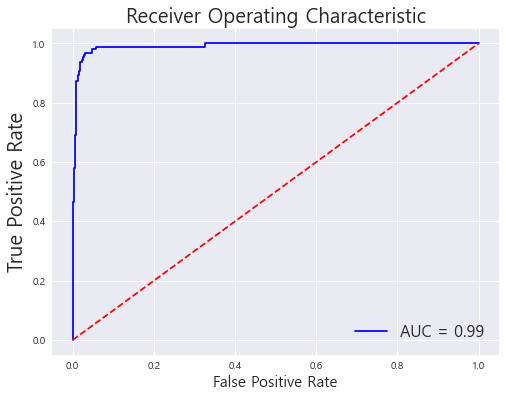

In [44]:
%%time
gbm = GradientBoostingClassifier(**gbm_cv.best_params_, validation_fraction=0.2, n_iter_no_change=100, tol=0.01)
gbm.fit(X_train_all, y_train_all)
pred = gbm.predict(X_test)
results(X_test, y_test, pred, gbm)

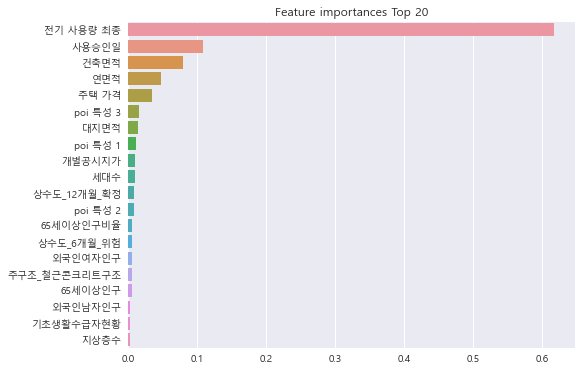

In [45]:
ftr_importances_values = gbm_cv.best_estimator_.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

Confusion Matrix:
[[697  13]
 [ 14 145]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       710
           1       0.92      0.91      0.91       159

    accuracy                           0.97       869
   macro avg       0.95      0.95      0.95       869
weighted avg       0.97      0.97      0.97       869

Wall time: 532 ms


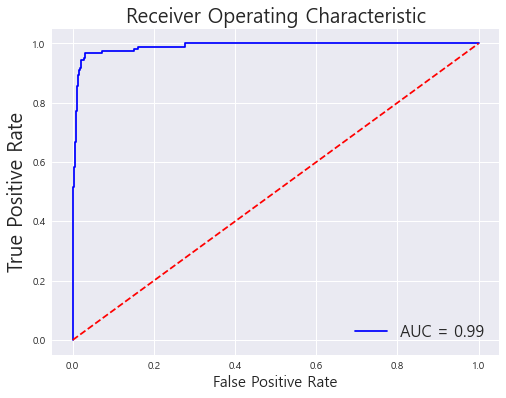

In [46]:
%%time
GBM = GradientBoostingClassifier()
GBM.fit(X_train_all , y_train_all)
pred1 = GBM.predict(X_test)
results(X_test, y_test, pred1, GBM)

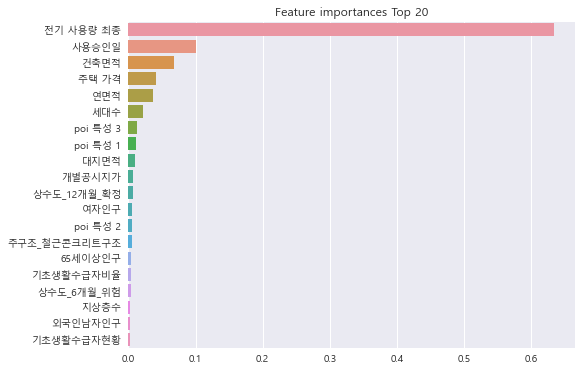

In [47]:
ftr_importances_values = GBM.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# XGBoost

In [48]:
%%time
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 200, tree_method = "gpu_hist", objective='binary:logistic',
                    scale_pos_weight= len(y[y==0]) / len(y[y==1]))

params={
    'booster' :['gbtree', 'dart'],
    'max_depth':[5,6,8],
    'subsample':[0.1,0.5,0.99],
    'colsample_bytree':[0.5,0.75,0.8],
}

xgb_cv = GridSearchCV(xgb, param_grid = params, cv=5, verbose=1)
xgb_cv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="logloss",
           eval_set=[(X_val, y_val)])

print("tuned hpyerparameters :(best parameters) ",xgb_cv.best_params_)
print("accuracy :",xgb_cv.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[0]	validation_0-logloss:0.56820
[1]	validation_0-logloss:0.43994
[2]	validation_0-logloss:0.39742
[3]	validation_0-logloss:0.32980
[4]	validation_0-logloss:0.31113
[5]	validation_0-logloss:0.26393
[6]	validation_0-logloss:0.25130
[7]	validation_0-logloss:0.22579
[8]	validation_0-logloss:0.21050
[9]	validation_0-logloss:0.21582
[10]	validation_0-logloss:0.22446
[11]	validation_0-logloss:0.20950
[12]	validation_0-logloss:0.20100
[13]	validation_0-logloss:0.19426
[14]	validation_0-logloss:0.19527
[15]	validation_0-logloss:0.19068
[16]	validation_0-logloss:0.19944
[17]	validation_0-logloss:0.20453
[18]	validation_0-logloss:0.20615
[19]	validation_0-logloss:0.20805
[20]	validation_0-logloss:0.19072
[21]	validation_0-logloss:0.18602
[22]	validation_0-logloss:0.19297
[23]	validation_0-logloss:0.18966
[24]	validation_0-logloss:0.18766
[25]	validation_0-logloss:0.18237
[26]	validation_0-logloss:0.18638
[27]	validation_0-logloss:0.18

[25]	validation_0-logloss:0.21099
[26]	validation_0-logloss:0.23406
[27]	validation_0-logloss:0.22814
[28]	validation_0-logloss:0.22220
[29]	validation_0-logloss:0.21629
[30]	validation_0-logloss:0.21352
[31]	validation_0-logloss:0.20499
[32]	validation_0-logloss:0.20428
[33]	validation_0-logloss:0.20116
[34]	validation_0-logloss:0.20518
[35]	validation_0-logloss:0.19965
[36]	validation_0-logloss:0.20192
[37]	validation_0-logloss:0.20372
[38]	validation_0-logloss:0.19788
[39]	validation_0-logloss:0.19575
[40]	validation_0-logloss:0.20000
[41]	validation_0-logloss:0.19861
[42]	validation_0-logloss:0.20571
[43]	validation_0-logloss:0.21040
[44]	validation_0-logloss:0.20667
[45]	validation_0-logloss:0.21136
[46]	validation_0-logloss:0.21387
[47]	validation_0-logloss:0.21489
[48]	validation_0-logloss:0.21400
[49]	validation_0-logloss:0.21229
[50]	validation_0-logloss:0.20996
[0]	validation_0-logloss:0.56840
[1]	validation_0-logloss:0.42510
[2]	validation_0-logloss:0.37952
[3]	validation_0-

[2]	validation_0-logloss:0.37032
[3]	validation_0-logloss:0.30016
[4]	validation_0-logloss:0.27914
[5]	validation_0-logloss:0.23992
[6]	validation_0-logloss:0.20841
[7]	validation_0-logloss:0.18679
[8]	validation_0-logloss:0.18141
[9]	validation_0-logloss:0.18001
[10]	validation_0-logloss:0.17111
[11]	validation_0-logloss:0.16409
[12]	validation_0-logloss:0.16390
[13]	validation_0-logloss:0.16376
[14]	validation_0-logloss:0.16460
[15]	validation_0-logloss:0.16021
[16]	validation_0-logloss:0.16332
[17]	validation_0-logloss:0.16464
[18]	validation_0-logloss:0.16117
[19]	validation_0-logloss:0.16182
[20]	validation_0-logloss:0.16517
[21]	validation_0-logloss:0.16707
[22]	validation_0-logloss:0.16914
[23]	validation_0-logloss:0.16779
[24]	validation_0-logloss:0.17078
[25]	validation_0-logloss:0.16966
[26]	validation_0-logloss:0.16858
[27]	validation_0-logloss:0.16655
[28]	validation_0-logloss:0.16845
[29]	validation_0-logloss:0.16547
[30]	validation_0-logloss:0.16766
[31]	validation_0-logl

[34]	validation_0-logloss:0.15109
[35]	validation_0-logloss:0.15225
[36]	validation_0-logloss:0.15101
[37]	validation_0-logloss:0.15080
[38]	validation_0-logloss:0.15169
[39]	validation_0-logloss:0.15215
[40]	validation_0-logloss:0.15246
[41]	validation_0-logloss:0.15160
[42]	validation_0-logloss:0.15076
[43]	validation_0-logloss:0.15262
[44]	validation_0-logloss:0.15198
[45]	validation_0-logloss:0.15253
[46]	validation_0-logloss:0.15261
[47]	validation_0-logloss:0.15251
[48]	validation_0-logloss:0.15253
[49]	validation_0-logloss:0.15335
[50]	validation_0-logloss:0.15353
[51]	validation_0-logloss:0.15349
[0]	validation_0-logloss:0.57313
[1]	validation_0-logloss:0.42491
[2]	validation_0-logloss:0.37723
[3]	validation_0-logloss:0.30368
[4]	validation_0-logloss:0.27779
[5]	validation_0-logloss:0.23411
[6]	validation_0-logloss:0.20311
[7]	validation_0-logloss:0.18247
[8]	validation_0-logloss:0.17510
[9]	validation_0-logloss:0.16820
[10]	validation_0-logloss:0.15959
[11]	validation_0-loglos

[55]	validation_0-logloss:0.25571
[56]	validation_0-logloss:0.25211
[57]	validation_0-logloss:0.26154
[58]	validation_0-logloss:0.24902
[59]	validation_0-logloss:0.24729
[60]	validation_0-logloss:0.25868
[61]	validation_0-logloss:0.25831
[62]	validation_0-logloss:0.25242
[0]	validation_0-logloss:0.56298
[1]	validation_0-logloss:0.43465
[2]	validation_0-logloss:0.38885
[3]	validation_0-logloss:0.31885
[4]	validation_0-logloss:0.29815
[5]	validation_0-logloss:0.25753
[6]	validation_0-logloss:0.23260
[7]	validation_0-logloss:0.21437
[8]	validation_0-logloss:0.20225
[9]	validation_0-logloss:0.21346
[10]	validation_0-logloss:0.21018
[11]	validation_0-logloss:0.20781
[12]	validation_0-logloss:0.20873
[13]	validation_0-logloss:0.20566
[14]	validation_0-logloss:0.20539
[15]	validation_0-logloss:0.20779
[16]	validation_0-logloss:0.21192
[17]	validation_0-logloss:0.21053
[18]	validation_0-logloss:0.20878
[19]	validation_0-logloss:0.19806
[20]	validation_0-logloss:0.20034
[21]	validation_0-loglos

[21]	validation_0-logloss:0.17028
[22]	validation_0-logloss:0.17352
[23]	validation_0-logloss:0.17345
[24]	validation_0-logloss:0.17237
[25]	validation_0-logloss:0.16998
[26]	validation_0-logloss:0.17211
[27]	validation_0-logloss:0.17343
[28]	validation_0-logloss:0.17807
[29]	validation_0-logloss:0.17523
[30]	validation_0-logloss:0.17786
[31]	validation_0-logloss:0.17453
[32]	validation_0-logloss:0.17175
[33]	validation_0-logloss:0.17122
[34]	validation_0-logloss:0.17010
[35]	validation_0-logloss:0.17097
[36]	validation_0-logloss:0.17451
[37]	validation_0-logloss:0.17243
[38]	validation_0-logloss:0.17383
[39]	validation_0-logloss:0.17597
[40]	validation_0-logloss:0.17446
[41]	validation_0-logloss:0.17619
[42]	validation_0-logloss:0.17600
[43]	validation_0-logloss:0.17557
[44]	validation_0-logloss:0.17511
[45]	validation_0-logloss:0.17716
[46]	validation_0-logloss:0.17775
[47]	validation_0-logloss:0.17897
[48]	validation_0-logloss:0.17816
[49]	validation_0-logloss:0.17811
[50]	validatio

[34]	validation_0-logloss:0.17137
[35]	validation_0-logloss:0.17282
[36]	validation_0-logloss:0.17323
[37]	validation_0-logloss:0.17545
[38]	validation_0-logloss:0.17576
[39]	validation_0-logloss:0.17628
[40]	validation_0-logloss:0.17738
[41]	validation_0-logloss:0.17733
[42]	validation_0-logloss:0.17818
[43]	validation_0-logloss:0.17750
[44]	validation_0-logloss:0.17731
[45]	validation_0-logloss:0.17887
[46]	validation_0-logloss:0.17958
[0]	validation_0-logloss:0.56599
[1]	validation_0-logloss:0.42437
[2]	validation_0-logloss:0.37658
[3]	validation_0-logloss:0.30407
[4]	validation_0-logloss:0.27657
[5]	validation_0-logloss:0.23434
[6]	validation_0-logloss:0.20604
[7]	validation_0-logloss:0.18874
[8]	validation_0-logloss:0.18391
[9]	validation_0-logloss:0.17658
[10]	validation_0-logloss:0.16780
[11]	validation_0-logloss:0.15951
[12]	validation_0-logloss:0.16065
[13]	validation_0-logloss:0.16093
[14]	validation_0-logloss:0.15848
[15]	validation_0-logloss:0.15261
[16]	validation_0-loglos

[19]	validation_0-logloss:0.18464
[20]	validation_0-logloss:0.17949
[21]	validation_0-logloss:0.17987
[22]	validation_0-logloss:0.19121
[23]	validation_0-logloss:0.19279
[24]	validation_0-logloss:0.18873
[25]	validation_0-logloss:0.19302
[26]	validation_0-logloss:0.21018
[27]	validation_0-logloss:0.19847
[28]	validation_0-logloss:0.20422
[29]	validation_0-logloss:0.19821
[30]	validation_0-logloss:0.19694
[31]	validation_0-logloss:0.18729
[32]	validation_0-logloss:0.18130
[33]	validation_0-logloss:0.18853
[34]	validation_0-logloss:0.19046
[35]	validation_0-logloss:0.19166
[36]	validation_0-logloss:0.20059
[37]	validation_0-logloss:0.20166
[38]	validation_0-logloss:0.20198
[39]	validation_0-logloss:0.20360
[40]	validation_0-logloss:0.20103
[41]	validation_0-logloss:0.19915
[42]	validation_0-logloss:0.20110
[43]	validation_0-logloss:0.21120
[44]	validation_0-logloss:0.20428
[45]	validation_0-logloss:0.20420
[46]	validation_0-logloss:0.19106
[47]	validation_0-logloss:0.19271
[48]	validatio

[26]	validation_0-logloss:0.15904
[27]	validation_0-logloss:0.15889
[28]	validation_0-logloss:0.15791
[29]	validation_0-logloss:0.15594
[30]	validation_0-logloss:0.15560
[31]	validation_0-logloss:0.15510
[32]	validation_0-logloss:0.15786
[33]	validation_0-logloss:0.15868
[34]	validation_0-logloss:0.16236
[35]	validation_0-logloss:0.16592
[36]	validation_0-logloss:0.16854
[37]	validation_0-logloss:0.16869
[38]	validation_0-logloss:0.16867
[39]	validation_0-logloss:0.16984
[40]	validation_0-logloss:0.17041
[41]	validation_0-logloss:0.17228
[42]	validation_0-logloss:0.17396
[43]	validation_0-logloss:0.17404
[44]	validation_0-logloss:0.17236
[45]	validation_0-logloss:0.17210
[46]	validation_0-logloss:0.17391
[47]	validation_0-logloss:0.17856
[48]	validation_0-logloss:0.18004
[49]	validation_0-logloss:0.17870
[50]	validation_0-logloss:0.17653
[51]	validation_0-logloss:0.17684
[52]	validation_0-logloss:0.17739
[53]	validation_0-logloss:0.17642
[54]	validation_0-logloss:0.17735
[55]	validatio

[0]	validation_0-logloss:0.56094
[1]	validation_0-logloss:0.41807
[2]	validation_0-logloss:0.36468
[3]	validation_0-logloss:0.29352
[4]	validation_0-logloss:0.27147
[5]	validation_0-logloss:0.23361
[6]	validation_0-logloss:0.20576
[7]	validation_0-logloss:0.18758
[8]	validation_0-logloss:0.18056
[9]	validation_0-logloss:0.17471
[10]	validation_0-logloss:0.16495
[11]	validation_0-logloss:0.15663
[12]	validation_0-logloss:0.15639
[13]	validation_0-logloss:0.15496
[14]	validation_0-logloss:0.15362
[15]	validation_0-logloss:0.14750
[16]	validation_0-logloss:0.15072
[17]	validation_0-logloss:0.15178
[18]	validation_0-logloss:0.15001
[19]	validation_0-logloss:0.15107
[20]	validation_0-logloss:0.14976
[21]	validation_0-logloss:0.14912
[22]	validation_0-logloss:0.14837
[23]	validation_0-logloss:0.14702
[24]	validation_0-logloss:0.14929
[25]	validation_0-logloss:0.15093
[26]	validation_0-logloss:0.15045
[27]	validation_0-logloss:0.15195
[28]	validation_0-logloss:0.15327
[29]	validation_0-loglos

[50]	validation_0-logloss:0.19429
[51]	validation_0-logloss:0.19769
[52]	validation_0-logloss:0.19830
[53]	validation_0-logloss:0.19940
[54]	validation_0-logloss:0.20092
[55]	validation_0-logloss:0.19289
[56]	validation_0-logloss:0.18587
[57]	validation_0-logloss:0.18262
[58]	validation_0-logloss:0.18465
[59]	validation_0-logloss:0.18243
[60]	validation_0-logloss:0.18509
[61]	validation_0-logloss:0.19587
[62]	validation_0-logloss:0.19381
[63]	validation_0-logloss:0.19657
[64]	validation_0-logloss:0.20141
[65]	validation_0-logloss:0.19983
[66]	validation_0-logloss:0.20507
[67]	validation_0-logloss:0.20709
[68]	validation_0-logloss:0.19819
[69]	validation_0-logloss:0.19494
[70]	validation_0-logloss:0.20279
[71]	validation_0-logloss:0.19372
[72]	validation_0-logloss:0.18584
[73]	validation_0-logloss:0.18259
[74]	validation_0-logloss:0.18046
[75]	validation_0-logloss:0.18323
[0]	validation_0-logloss:0.49991
[1]	validation_0-logloss:0.40843
[2]	validation_0-logloss:0.32960
[3]	validation_0-

[13]	validation_0-logloss:0.18102
[14]	validation_0-logloss:0.17667
[15]	validation_0-logloss:0.17936
[16]	validation_0-logloss:0.18194
[17]	validation_0-logloss:0.18157
[18]	validation_0-logloss:0.18189
[19]	validation_0-logloss:0.17961
[20]	validation_0-logloss:0.18121
[21]	validation_0-logloss:0.18014
[22]	validation_0-logloss:0.18497
[23]	validation_0-logloss:0.18019
[24]	validation_0-logloss:0.17937
[25]	validation_0-logloss:0.17958
[26]	validation_0-logloss:0.18404
[27]	validation_0-logloss:0.18446
[28]	validation_0-logloss:0.18300
[29]	validation_0-logloss:0.17950
[30]	validation_0-logloss:0.17987
[31]	validation_0-logloss:0.18056
[32]	validation_0-logloss:0.17827
[33]	validation_0-logloss:0.17743
[34]	validation_0-logloss:0.17684
[35]	validation_0-logloss:0.17601
[36]	validation_0-logloss:0.17867
[37]	validation_0-logloss:0.17725
[38]	validation_0-logloss:0.17712
[39]	validation_0-logloss:0.17823
[40]	validation_0-logloss:0.17869
[41]	validation_0-logloss:0.18125
[42]	validatio

[39]	validation_0-logloss:0.18042
[40]	validation_0-logloss:0.18001
[41]	validation_0-logloss:0.18113
[42]	validation_0-logloss:0.18119
[0]	validation_0-logloss:0.48953
[1]	validation_0-logloss:0.37612
[2]	validation_0-logloss:0.30767
[3]	validation_0-logloss:0.26322
[4]	validation_0-logloss:0.23074
[5]	validation_0-logloss:0.20966
[6]	validation_0-logloss:0.19741
[7]	validation_0-logloss:0.18922
[8]	validation_0-logloss:0.18232
[9]	validation_0-logloss:0.17518
[10]	validation_0-logloss:0.17040
[11]	validation_0-logloss:0.16713
[12]	validation_0-logloss:0.16209
[13]	validation_0-logloss:0.16067
[14]	validation_0-logloss:0.15906
[15]	validation_0-logloss:0.15967
[16]	validation_0-logloss:0.15806
[17]	validation_0-logloss:0.15670
[18]	validation_0-logloss:0.15604
[19]	validation_0-logloss:0.15552
[20]	validation_0-logloss:0.15512
[21]	validation_0-logloss:0.15551
[22]	validation_0-logloss:0.15562
[23]	validation_0-logloss:0.15592
[24]	validation_0-logloss:0.15834
[25]	validation_0-loglos

[7]	validation_0-logloss:0.20392
[8]	validation_0-logloss:0.18835
[9]	validation_0-logloss:0.20149
[10]	validation_0-logloss:0.20128
[11]	validation_0-logloss:0.19295
[12]	validation_0-logloss:0.19272
[13]	validation_0-logloss:0.19302
[14]	validation_0-logloss:0.19173
[15]	validation_0-logloss:0.18326
[16]	validation_0-logloss:0.18533
[17]	validation_0-logloss:0.19110
[18]	validation_0-logloss:0.18613
[19]	validation_0-logloss:0.18167
[20]	validation_0-logloss:0.18615
[21]	validation_0-logloss:0.18194
[22]	validation_0-logloss:0.19312
[23]	validation_0-logloss:0.18687
[24]	validation_0-logloss:0.18068
[25]	validation_0-logloss:0.18363
[26]	validation_0-logloss:0.19254
[27]	validation_0-logloss:0.19247
[28]	validation_0-logloss:0.18275
[29]	validation_0-logloss:0.18023
[30]	validation_0-logloss:0.18694
[31]	validation_0-logloss:0.18480
[32]	validation_0-logloss:0.18593
[33]	validation_0-logloss:0.19451
[34]	validation_0-logloss:0.19457
[35]	validation_0-logloss:0.19883
[36]	validation_0

[32]	validation_0-logloss:0.18692
[33]	validation_0-logloss:0.18526
[34]	validation_0-logloss:0.18544
[35]	validation_0-logloss:0.18233
[36]	validation_0-logloss:0.18527
[37]	validation_0-logloss:0.18527
[38]	validation_0-logloss:0.18600
[39]	validation_0-logloss:0.18788
[40]	validation_0-logloss:0.18904
[41]	validation_0-logloss:0.18886
[42]	validation_0-logloss:0.18824
[43]	validation_0-logloss:0.18929
[44]	validation_0-logloss:0.19069
[45]	validation_0-logloss:0.19258
[46]	validation_0-logloss:0.19278
[47]	validation_0-logloss:0.19197
[48]	validation_0-logloss:0.19332
[49]	validation_0-logloss:0.19388
[50]	validation_0-logloss:0.19130
[0]	validation_0-logloss:0.49162
[1]	validation_0-logloss:0.38219
[2]	validation_0-logloss:0.31639
[3]	validation_0-logloss:0.26921
[4]	validation_0-logloss:0.24338
[5]	validation_0-logloss:0.21859
[6]	validation_0-logloss:0.21014
[7]	validation_0-logloss:0.19735
[8]	validation_0-logloss:0.19012
[9]	validation_0-logloss:0.18772
[10]	validation_0-loglos

[3]	validation_0-logloss:0.25756
[4]	validation_0-logloss:0.22874
[5]	validation_0-logloss:0.20951
[6]	validation_0-logloss:0.19604
[7]	validation_0-logloss:0.18732
[8]	validation_0-logloss:0.18259
[9]	validation_0-logloss:0.17577
[10]	validation_0-logloss:0.16944
[11]	validation_0-logloss:0.16772
[12]	validation_0-logloss:0.16691
[13]	validation_0-logloss:0.16417
[14]	validation_0-logloss:0.16374
[15]	validation_0-logloss:0.16481
[16]	validation_0-logloss:0.16443
[17]	validation_0-logloss:0.16226
[18]	validation_0-logloss:0.16116
[19]	validation_0-logloss:0.16170
[20]	validation_0-logloss:0.16305
[21]	validation_0-logloss:0.16410
[22]	validation_0-logloss:0.16377
[23]	validation_0-logloss:0.16287
[24]	validation_0-logloss:0.16617
[25]	validation_0-logloss:0.16877
[26]	validation_0-logloss:0.16841
[27]	validation_0-logloss:0.16961
[28]	validation_0-logloss:0.17289
[29]	validation_0-logloss:0.17162
[30]	validation_0-logloss:0.17473
[31]	validation_0-logloss:0.17459
[32]	validation_0-log

[14]	validation_0-logloss:0.19173
[15]	validation_0-logloss:0.18326
[16]	validation_0-logloss:0.18533
[17]	validation_0-logloss:0.19110
[18]	validation_0-logloss:0.18613
[19]	validation_0-logloss:0.18167
[20]	validation_0-logloss:0.18615
[21]	validation_0-logloss:0.18194
[22]	validation_0-logloss:0.19312
[23]	validation_0-logloss:0.18687
[24]	validation_0-logloss:0.18068
[25]	validation_0-logloss:0.18363
[26]	validation_0-logloss:0.19254
[27]	validation_0-logloss:0.19247
[28]	validation_0-logloss:0.18275
[29]	validation_0-logloss:0.18023
[30]	validation_0-logloss:0.18694
[31]	validation_0-logloss:0.18480
[32]	validation_0-logloss:0.18593
[33]	validation_0-logloss:0.19451
[34]	validation_0-logloss:0.19457
[35]	validation_0-logloss:0.19883
[36]	validation_0-logloss:0.20734
[37]	validation_0-logloss:0.20104
[38]	validation_0-logloss:0.18160
[39]	validation_0-logloss:0.18101
[40]	validation_0-logloss:0.18462
[41]	validation_0-logloss:0.18528
[42]	validation_0-logloss:0.19088
[43]	validatio

[43]	validation_0-logloss:0.18858
[44]	validation_0-logloss:0.18651
[45]	validation_0-logloss:0.18694
[46]	validation_0-logloss:0.18917
[47]	validation_0-logloss:0.18712
[48]	validation_0-logloss:0.18809
[0]	validation_0-logloss:0.49162
[1]	validation_0-logloss:0.38219
[2]	validation_0-logloss:0.31645
[3]	validation_0-logloss:0.26913
[4]	validation_0-logloss:0.24079
[5]	validation_0-logloss:0.21878
[6]	validation_0-logloss:0.20685
[7]	validation_0-logloss:0.19150
[8]	validation_0-logloss:0.18263
[9]	validation_0-logloss:0.17660
[10]	validation_0-logloss:0.17694
[11]	validation_0-logloss:0.17077
[12]	validation_0-logloss:0.17339
[13]	validation_0-logloss:0.16959
[14]	validation_0-logloss:0.16746
[15]	validation_0-logloss:0.16442
[16]	validation_0-logloss:0.16874
[17]	validation_0-logloss:0.17027
[18]	validation_0-logloss:0.16917
[19]	validation_0-logloss:0.16744
[20]	validation_0-logloss:0.16830
[21]	validation_0-logloss:0.16742
[22]	validation_0-logloss:0.17204
[23]	validation_0-loglos

[40]	validation_0-logloss:0.19118
[0]	validation_0-logloss:0.48368
[1]	validation_0-logloss:0.36751
[2]	validation_0-logloss:0.29699
[3]	validation_0-logloss:0.25059
[4]	validation_0-logloss:0.21830
[5]	validation_0-logloss:0.19949
[6]	validation_0-logloss:0.18561
[7]	validation_0-logloss:0.17617
[8]	validation_0-logloss:0.17001
[9]	validation_0-logloss:0.16178
[10]	validation_0-logloss:0.15536
[11]	validation_0-logloss:0.15478
[12]	validation_0-logloss:0.15150
[13]	validation_0-logloss:0.14995
[14]	validation_0-logloss:0.15025
[15]	validation_0-logloss:0.15127
[16]	validation_0-logloss:0.15228
[17]	validation_0-logloss:0.15100
[18]	validation_0-logloss:0.15360
[19]	validation_0-logloss:0.15347
[20]	validation_0-logloss:0.15244
[21]	validation_0-logloss:0.15294
[22]	validation_0-logloss:0.15416
[23]	validation_0-logloss:0.15407
[24]	validation_0-logloss:0.15422
[25]	validation_0-logloss:0.15580
[26]	validation_0-logloss:0.15751
[27]	validation_0-logloss:0.15927
[28]	validation_0-loglos

[16]	validation_0-logloss:0.18670
[17]	validation_0-logloss:0.18616
[18]	validation_0-logloss:0.18525
[19]	validation_0-logloss:0.18087
[20]	validation_0-logloss:0.18560
[21]	validation_0-logloss:0.17672
[22]	validation_0-logloss:0.18492
[23]	validation_0-logloss:0.17859
[24]	validation_0-logloss:0.17720
[25]	validation_0-logloss:0.18586
[26]	validation_0-logloss:0.19354
[27]	validation_0-logloss:0.19181
[28]	validation_0-logloss:0.18924
[29]	validation_0-logloss:0.18814
[30]	validation_0-logloss:0.19073
[31]	validation_0-logloss:0.18228
[32]	validation_0-logloss:0.17641
[33]	validation_0-logloss:0.17989
[34]	validation_0-logloss:0.18742
[35]	validation_0-logloss:0.18635
[36]	validation_0-logloss:0.19820
[37]	validation_0-logloss:0.20236
[38]	validation_0-logloss:0.18492
[39]	validation_0-logloss:0.18251
[40]	validation_0-logloss:0.18658
[41]	validation_0-logloss:0.20133
[42]	validation_0-logloss:0.20332
[43]	validation_0-logloss:0.20311
[44]	validation_0-logloss:0.19977
[45]	validatio

[39]	validation_0-logloss:0.18289
[40]	validation_0-logloss:0.17881
[41]	validation_0-logloss:0.17651
[0]	validation_0-logloss:0.49162
[1]	validation_0-logloss:0.38009
[2]	validation_0-logloss:0.31359
[3]	validation_0-logloss:0.26981
[4]	validation_0-logloss:0.24434
[5]	validation_0-logloss:0.22629
[6]	validation_0-logloss:0.21287
[7]	validation_0-logloss:0.19602
[8]	validation_0-logloss:0.18779
[9]	validation_0-logloss:0.18504
[10]	validation_0-logloss:0.18071
[11]	validation_0-logloss:0.17654
[12]	validation_0-logloss:0.17731
[13]	validation_0-logloss:0.17571
[14]	validation_0-logloss:0.17510
[15]	validation_0-logloss:0.17490
[16]	validation_0-logloss:0.17856
[17]	validation_0-logloss:0.18085
[18]	validation_0-logloss:0.17824
[19]	validation_0-logloss:0.17413
[20]	validation_0-logloss:0.17735
[21]	validation_0-logloss:0.17262
[22]	validation_0-logloss:0.17809
[23]	validation_0-logloss:0.17644
[24]	validation_0-logloss:0.17775
[25]	validation_0-logloss:0.17619
[26]	validation_0-loglos

[31]	validation_0-logloss:0.17857
[32]	validation_0-logloss:0.18117
[33]	validation_0-logloss:0.18111
[34]	validation_0-logloss:0.18032
[35]	validation_0-logloss:0.18149
[36]	validation_0-logloss:0.18173
[37]	validation_0-logloss:0.18278
[38]	validation_0-logloss:0.18453
[39]	validation_0-logloss:0.18615
[40]	validation_0-logloss:0.18818
[41]	validation_0-logloss:0.18881
[42]	validation_0-logloss:0.18891
[0]	validation_0-logloss:0.48953
[1]	validation_0-logloss:0.38079
[2]	validation_0-logloss:0.31203
[3]	validation_0-logloss:0.26376
[4]	validation_0-logloss:0.23536
[5]	validation_0-logloss:0.21455
[6]	validation_0-logloss:0.20109
[7]	validation_0-logloss:0.18840
[8]	validation_0-logloss:0.17921
[9]	validation_0-logloss:0.17376
[10]	validation_0-logloss:0.16804
[11]	validation_0-logloss:0.16477
[12]	validation_0-logloss:0.16331
[13]	validation_0-logloss:0.16165
[14]	validation_0-logloss:0.16041
[15]	validation_0-logloss:0.15953
[16]	validation_0-logloss:0.15950
[17]	validation_0-loglos

[43]	validation_0-logloss:0.19587
[44]	validation_0-logloss:0.19048
[45]	validation_0-logloss:0.19004
[46]	validation_0-logloss:0.17863
[47]	validation_0-logloss:0.18766
[48]	validation_0-logloss:0.19400
[49]	validation_0-logloss:0.18810
[50]	validation_0-logloss:0.19260
[0]	validation_0-logloss:0.50309
[1]	validation_0-logloss:0.39600
[2]	validation_0-logloss:0.33175
[3]	validation_0-logloss:0.29295
[4]	validation_0-logloss:0.26114
[5]	validation_0-logloss:0.23210
[6]	validation_0-logloss:0.20782
[7]	validation_0-logloss:0.19531
[8]	validation_0-logloss:0.18151
[9]	validation_0-logloss:0.18766
[10]	validation_0-logloss:0.18646
[11]	validation_0-logloss:0.18402
[12]	validation_0-logloss:0.18073
[13]	validation_0-logloss:0.18186
[14]	validation_0-logloss:0.17955
[15]	validation_0-logloss:0.18812
[16]	validation_0-logloss:0.18587
[17]	validation_0-logloss:0.17817
[18]	validation_0-logloss:0.17251
[19]	validation_0-logloss:0.16943
[20]	validation_0-logloss:0.16910
[21]	validation_0-loglos

[36]	validation_0-logloss:0.19161
[37]	validation_0-logloss:0.19515
[38]	validation_0-logloss:0.19683
[39]	validation_0-logloss:0.19912
[40]	validation_0-logloss:0.19749
[41]	validation_0-logloss:0.19740
[42]	validation_0-logloss:0.19807
[43]	validation_0-logloss:0.19611
[44]	validation_0-logloss:0.19628
[45]	validation_0-logloss:0.19646
[46]	validation_0-logloss:0.19873
[47]	validation_0-logloss:0.19542
[0]	validation_0-logloss:0.49162
[1]	validation_0-logloss:0.37970
[2]	validation_0-logloss:0.31445
[3]	validation_0-logloss:0.26912
[4]	validation_0-logloss:0.24448
[5]	validation_0-logloss:0.22452
[6]	validation_0-logloss:0.21477
[7]	validation_0-logloss:0.20379
[8]	validation_0-logloss:0.19704
[9]	validation_0-logloss:0.19238
[10]	validation_0-logloss:0.18535
[11]	validation_0-logloss:0.18400
[12]	validation_0-logloss:0.18902
[13]	validation_0-logloss:0.18548
[14]	validation_0-logloss:0.18355
[15]	validation_0-logloss:0.18618
[16]	validation_0-logloss:0.18746
[17]	validation_0-loglos

[30]	validation_0-logloss:0.18583
[31]	validation_0-logloss:0.18468
[32]	validation_0-logloss:0.18632
[33]	validation_0-logloss:0.18851
[34]	validation_0-logloss:0.19054
[35]	validation_0-logloss:0.19062
[36]	validation_0-logloss:0.19052
[37]	validation_0-logloss:0.18937
[38]	validation_0-logloss:0.18980
[39]	validation_0-logloss:0.19147
[40]	validation_0-logloss:0.19334
[41]	validation_0-logloss:0.19143
[0]	validation_0-logloss:0.48704
[1]	validation_0-logloss:0.37504
[2]	validation_0-logloss:0.30259
[3]	validation_0-logloss:0.25469
[4]	validation_0-logloss:0.22295
[5]	validation_0-logloss:0.20473
[6]	validation_0-logloss:0.18949
[7]	validation_0-logloss:0.17794
[8]	validation_0-logloss:0.17205
[9]	validation_0-logloss:0.16568
[10]	validation_0-logloss:0.15902
[11]	validation_0-logloss:0.15653
[12]	validation_0-logloss:0.15390
[13]	validation_0-logloss:0.15061
[14]	validation_0-logloss:0.14822
[15]	validation_0-logloss:0.14705
[16]	validation_0-logloss:0.14688
[17]	validation_0-loglos

[1]	validation_0-logloss:0.39600
[2]	validation_0-logloss:0.33175
[3]	validation_0-logloss:0.29295
[4]	validation_0-logloss:0.26114
[5]	validation_0-logloss:0.23210
[6]	validation_0-logloss:0.20782
[7]	validation_0-logloss:0.19531
[8]	validation_0-logloss:0.18151
[9]	validation_0-logloss:0.18766
[10]	validation_0-logloss:0.18646
[11]	validation_0-logloss:0.18402
[12]	validation_0-logloss:0.18073
[13]	validation_0-logloss:0.18186
[14]	validation_0-logloss:0.17955
[15]	validation_0-logloss:0.18812
[16]	validation_0-logloss:0.18587
[17]	validation_0-logloss:0.17817
[18]	validation_0-logloss:0.17251
[19]	validation_0-logloss:0.16943
[20]	validation_0-logloss:0.16910
[21]	validation_0-logloss:0.16769
[22]	validation_0-logloss:0.18076
[23]	validation_0-logloss:0.18289
[24]	validation_0-logloss:0.18321
[25]	validation_0-logloss:0.18525
[26]	validation_0-logloss:0.19385
[27]	validation_0-logloss:0.19533
[28]	validation_0-logloss:0.19379
[29]	validation_0-logloss:0.19254
[30]	validation_0-loglo

[58]	validation_0-logloss:0.20098
[59]	validation_0-logloss:0.20108
[0]	validation_0-logloss:0.49162
[1]	validation_0-logloss:0.37970
[2]	validation_0-logloss:0.31450
[3]	validation_0-logloss:0.26904
[4]	validation_0-logloss:0.24184
[5]	validation_0-logloss:0.22394
[6]	validation_0-logloss:0.20943
[7]	validation_0-logloss:0.19152
[8]	validation_0-logloss:0.18566
[9]	validation_0-logloss:0.18354
[10]	validation_0-logloss:0.18235
[11]	validation_0-logloss:0.17911
[12]	validation_0-logloss:0.18341
[13]	validation_0-logloss:0.18270
[14]	validation_0-logloss:0.18190
[15]	validation_0-logloss:0.18500
[16]	validation_0-logloss:0.18661
[17]	validation_0-logloss:0.18491
[18]	validation_0-logloss:0.18220
[19]	validation_0-logloss:0.18243
[20]	validation_0-logloss:0.18192
[21]	validation_0-logloss:0.17947
[22]	validation_0-logloss:0.18317
[23]	validation_0-logloss:0.17746
[24]	validation_0-logloss:0.17880
[25]	validation_0-logloss:0.18078
[26]	validation_0-logloss:0.18287
[27]	validation_0-loglos

[34]	validation_0-logloss:0.18642
[35]	validation_0-logloss:0.18891
[36]	validation_0-logloss:0.18912
[37]	validation_0-logloss:0.18915
[38]	validation_0-logloss:0.18972
[39]	validation_0-logloss:0.18929
[40]	validation_0-logloss:0.19140
[41]	validation_0-logloss:0.19210
[0]	validation_0-logloss:0.48368
[1]	validation_0-logloss:0.37017
[2]	validation_0-logloss:0.29757
[3]	validation_0-logloss:0.25195
[4]	validation_0-logloss:0.22071
[5]	validation_0-logloss:0.20070
[6]	validation_0-logloss:0.18357
[7]	validation_0-logloss:0.17210
[8]	validation_0-logloss:0.16948
[9]	validation_0-logloss:0.16179
[10]	validation_0-logloss:0.15625
[11]	validation_0-logloss:0.15552
[12]	validation_0-logloss:0.15269
[13]	validation_0-logloss:0.15002
[14]	validation_0-logloss:0.14875
[15]	validation_0-logloss:0.14917
[16]	validation_0-logloss:0.15093
[17]	validation_0-logloss:0.14951
[18]	validation_0-logloss:0.15080
[19]	validation_0-logloss:0.15108
[20]	validation_0-logloss:0.15275
[21]	validation_0-loglos

[31]	validation_0-logloss:0.19314
[32]	validation_0-logloss:0.18893
[33]	validation_0-logloss:0.18997
[34]	validation_0-logloss:0.18804
[35]	validation_0-logloss:0.18943
[36]	validation_0-logloss:0.19724
[37]	validation_0-logloss:0.19586
[38]	validation_0-logloss:0.20022
[39]	validation_0-logloss:0.20602
[40]	validation_0-logloss:0.22222
[41]	validation_0-logloss:0.22738
[42]	validation_0-logloss:0.22308
[43]	validation_0-logloss:0.23115
[44]	validation_0-logloss:0.22634
[45]	validation_0-logloss:0.21798
[46]	validation_0-logloss:0.22067
[47]	validation_0-logloss:0.22241
[48]	validation_0-logloss:0.22574
[49]	validation_0-logloss:0.22788
[50]	validation_0-logloss:0.22642
[51]	validation_0-logloss:0.22500
[52]	validation_0-logloss:0.23075
[53]	validation_0-logloss:0.23216
[54]	validation_0-logloss:0.22772
[55]	validation_0-logloss:0.23179
[0]	validation_0-logloss:0.56379
[1]	validation_0-logloss:0.43179
[2]	validation_0-logloss:0.38932
[3]	validation_0-logloss:0.34365
[4]	validation_0-l

[11]	validation_0-logloss:0.17909
[12]	validation_0-logloss:0.17309
[13]	validation_0-logloss:0.17543
[14]	validation_0-logloss:0.17259
[15]	validation_0-logloss:0.16989
[16]	validation_0-logloss:0.16321
[17]	validation_0-logloss:0.16024
[18]	validation_0-logloss:0.15670
[19]	validation_0-logloss:0.15516
[20]	validation_0-logloss:0.15319
[21]	validation_0-logloss:0.15272
[22]	validation_0-logloss:0.15227
[23]	validation_0-logloss:0.15181
[24]	validation_0-logloss:0.15352
[25]	validation_0-logloss:0.15317
[26]	validation_0-logloss:0.15227
[27]	validation_0-logloss:0.15465
[28]	validation_0-logloss:0.15724
[29]	validation_0-logloss:0.15427
[30]	validation_0-logloss:0.15671
[31]	validation_0-logloss:0.15585
[32]	validation_0-logloss:0.15570
[33]	validation_0-logloss:0.15289
[34]	validation_0-logloss:0.15314
[35]	validation_0-logloss:0.15563
[36]	validation_0-logloss:0.15608
[37]	validation_0-logloss:0.15675
[38]	validation_0-logloss:0.15437
[39]	validation_0-logloss:0.15888
[40]	validatio

[31]	validation_0-logloss:0.16785
[32]	validation_0-logloss:0.16735
[33]	validation_0-logloss:0.16883
[34]	validation_0-logloss:0.16912
[35]	validation_0-logloss:0.16937
[36]	validation_0-logloss:0.16873
[37]	validation_0-logloss:0.16940
[38]	validation_0-logloss:0.17169
[39]	validation_0-logloss:0.17344
[40]	validation_0-logloss:0.17396
[41]	validation_0-logloss:0.17528
[42]	validation_0-logloss:0.17470
[43]	validation_0-logloss:0.17707
[44]	validation_0-logloss:0.17652
[45]	validation_0-logloss:0.17695
[46]	validation_0-logloss:0.17905
[47]	validation_0-logloss:0.18021
[48]	validation_0-logloss:0.18178
[49]	validation_0-logloss:0.18309
[50]	validation_0-logloss:0.18314
[51]	validation_0-logloss:0.18338
[0]	validation_0-logloss:0.57247
[1]	validation_0-logloss:0.42753
[2]	validation_0-logloss:0.37935
[3]	validation_0-logloss:0.30622
[4]	validation_0-logloss:0.28845
[5]	validation_0-logloss:0.24952
[6]	validation_0-logloss:0.22475
[7]	validation_0-logloss:0.20490
[8]	validation_0-loglo

[45]	validation_0-logloss:0.15777
[46]	validation_0-logloss:0.15939
[47]	validation_0-logloss:0.15946
[48]	validation_0-logloss:0.16088
[49]	validation_0-logloss:0.16268
[50]	validation_0-logloss:0.16407
[51]	validation_0-logloss:0.16465
[52]	validation_0-logloss:0.16464
[53]	validation_0-logloss:0.16696
[54]	validation_0-logloss:0.16724
[55]	validation_0-logloss:0.16776
[0]	validation_0-logloss:0.56820
[1]	validation_0-logloss:0.44072
[2]	validation_0-logloss:0.37583
[3]	validation_0-logloss:0.32043
[4]	validation_0-logloss:0.29631
[5]	validation_0-logloss:0.25587
[6]	validation_0-logloss:0.23687
[7]	validation_0-logloss:0.21486
[8]	validation_0-logloss:0.21185
[9]	validation_0-logloss:0.21429
[10]	validation_0-logloss:0.21064
[11]	validation_0-logloss:0.21113
[12]	validation_0-logloss:0.20341
[13]	validation_0-logloss:0.20331
[14]	validation_0-logloss:0.20957
[15]	validation_0-logloss:0.20489
[16]	validation_0-logloss:0.19674
[17]	validation_0-logloss:0.19161
[18]	validation_0-loglos

[31]	validation_0-logloss:0.17512
[32]	validation_0-logloss:0.17911
[33]	validation_0-logloss:0.18449
[34]	validation_0-logloss:0.19007
[35]	validation_0-logloss:0.19454
[36]	validation_0-logloss:0.20071
[37]	validation_0-logloss:0.19918
[38]	validation_0-logloss:0.19615
[39]	validation_0-logloss:0.19993
[40]	validation_0-logloss:0.21033
[41]	validation_0-logloss:0.20267
[42]	validation_0-logloss:0.20914
[43]	validation_0-logloss:0.20794
[44]	validation_0-logloss:0.19961
[45]	validation_0-logloss:0.20359
[46]	validation_0-logloss:0.19840
[47]	validation_0-logloss:0.19739
[48]	validation_0-logloss:0.20320
[49]	validation_0-logloss:0.20347
[50]	validation_0-logloss:0.20427
[51]	validation_0-logloss:0.20772
[52]	validation_0-logloss:0.20792
[53]	validation_0-logloss:0.21072
[54]	validation_0-logloss:0.20786
[55]	validation_0-logloss:0.20766
[56]	validation_0-logloss:0.21687
[57]	validation_0-logloss:0.23208
[58]	validation_0-logloss:0.23164
[59]	validation_0-logloss:0.23145
[0]	validation

[42]	validation_0-logloss:0.16821
[43]	validation_0-logloss:0.16754
[44]	validation_0-logloss:0.16599
[45]	validation_0-logloss:0.16437
[46]	validation_0-logloss:0.16699
[47]	validation_0-logloss:0.16643
[48]	validation_0-logloss:0.16717
[49]	validation_0-logloss:0.16937
[0]	validation_0-logloss:0.57481
[1]	validation_0-logloss:0.43475
[2]	validation_0-logloss:0.38592
[3]	validation_0-logloss:0.31217
[4]	validation_0-logloss:0.28889
[5]	validation_0-logloss:0.24687
[6]	validation_0-logloss:0.21997
[7]	validation_0-logloss:0.20235
[8]	validation_0-logloss:0.20302
[9]	validation_0-logloss:0.19506
[10]	validation_0-logloss:0.18759
[11]	validation_0-logloss:0.17860
[12]	validation_0-logloss:0.17372
[13]	validation_0-logloss:0.16928
[14]	validation_0-logloss:0.17259
[15]	validation_0-logloss:0.16808
[16]	validation_0-logloss:0.16610
[17]	validation_0-logloss:0.16496
[18]	validation_0-logloss:0.16185
[19]	validation_0-logloss:0.16502
[20]	validation_0-logloss:0.16300
[21]	validation_0-loglos

[43]	validation_0-logloss:0.15478
[44]	validation_0-logloss:0.15629
[45]	validation_0-logloss:0.15819
[46]	validation_0-logloss:0.15782
[47]	validation_0-logloss:0.15782
[48]	validation_0-logloss:0.15744
[49]	validation_0-logloss:0.15845
[50]	validation_0-logloss:0.15855
[51]	validation_0-logloss:0.15912
[52]	validation_0-logloss:0.15883
[53]	validation_0-logloss:0.15926
[0]	validation_0-logloss:0.56612
[1]	validation_0-logloss:0.42002
[2]	validation_0-logloss:0.36960
[3]	validation_0-logloss:0.29650
[4]	validation_0-logloss:0.27629
[5]	validation_0-logloss:0.23342
[6]	validation_0-logloss:0.20335
[7]	validation_0-logloss:0.18292
[8]	validation_0-logloss:0.17429
[9]	validation_0-logloss:0.16923
[10]	validation_0-logloss:0.16044
[11]	validation_0-logloss:0.15294
[12]	validation_0-logloss:0.15361
[13]	validation_0-logloss:0.15195
[14]	validation_0-logloss:0.15210
[15]	validation_0-logloss:0.14800
[16]	validation_0-logloss:0.14960
[17]	validation_0-logloss:0.15061
[18]	validation_0-loglos

[25]	validation_0-logloss:0.22373
[26]	validation_0-logloss:0.22045
[27]	validation_0-logloss:0.20774
[28]	validation_0-logloss:0.20939
[29]	validation_0-logloss:0.21018
[30]	validation_0-logloss:0.20929
[31]	validation_0-logloss:0.21422
[32]	validation_0-logloss:0.21883
[33]	validation_0-logloss:0.21698
[34]	validation_0-logloss:0.21938
[35]	validation_0-logloss:0.22366
[36]	validation_0-logloss:0.22541
[37]	validation_0-logloss:0.23282
[38]	validation_0-logloss:0.22865
[39]	validation_0-logloss:0.23125
[40]	validation_0-logloss:0.23112
[41]	validation_0-logloss:0.22838
[42]	validation_0-logloss:0.23143
[0]	validation_0-logloss:0.55871
[1]	validation_0-logloss:0.43212
[2]	validation_0-logloss:0.41304
[3]	validation_0-logloss:0.34175
[4]	validation_0-logloss:0.31567
[5]	validation_0-logloss:0.27163
[6]	validation_0-logloss:0.24814
[7]	validation_0-logloss:0.22575
[8]	validation_0-logloss:0.22545
[9]	validation_0-logloss:0.22219
[10]	validation_0-logloss:0.20927
[11]	validation_0-loglos

[39]	validation_0-logloss:0.17015
[40]	validation_0-logloss:0.17251
[41]	validation_0-logloss:0.17217
[42]	validation_0-logloss:0.17361
[43]	validation_0-logloss:0.17354
[44]	validation_0-logloss:0.17490
[45]	validation_0-logloss:0.17868
[46]	validation_0-logloss:0.17805
[47]	validation_0-logloss:0.17894
[48]	validation_0-logloss:0.17794
[49]	validation_0-logloss:0.17713
[50]	validation_0-logloss:0.17812
[51]	validation_0-logloss:0.17753
[52]	validation_0-logloss:0.18087
[53]	validation_0-logloss:0.18088
[54]	validation_0-logloss:0.18013
[55]	validation_0-logloss:0.17799
[0]	validation_0-logloss:0.55334
[1]	validation_0-logloss:0.41069
[2]	validation_0-logloss:0.35597
[3]	validation_0-logloss:0.28859
[4]	validation_0-logloss:0.26322
[5]	validation_0-logloss:0.22650
[6]	validation_0-logloss:0.20459
[7]	validation_0-logloss:0.18504
[8]	validation_0-logloss:0.18158
[9]	validation_0-logloss:0.17376
[10]	validation_0-logloss:0.16907
[11]	validation_0-logloss:0.16058
[12]	validation_0-loglos

[16]	validation_0-logloss:0.15933
[17]	validation_0-logloss:0.16155
[18]	validation_0-logloss:0.16023
[19]	validation_0-logloss:0.16235
[20]	validation_0-logloss:0.16254
[21]	validation_0-logloss:0.16197
[22]	validation_0-logloss:0.16375
[23]	validation_0-logloss:0.16419
[24]	validation_0-logloss:0.16575
[25]	validation_0-logloss:0.16682
[26]	validation_0-logloss:0.16777
[27]	validation_0-logloss:0.16889
[28]	validation_0-logloss:0.16959
[29]	validation_0-logloss:0.17096
[30]	validation_0-logloss:0.17109
[31]	validation_0-logloss:0.17137
[32]	validation_0-logloss:0.17029
[33]	validation_0-logloss:0.16959
[34]	validation_0-logloss:0.16763
[35]	validation_0-logloss:0.16731
[36]	validation_0-logloss:0.16588
[37]	validation_0-logloss:0.16758
[38]	validation_0-logloss:0.16855
[39]	validation_0-logloss:0.16902
[40]	validation_0-logloss:0.16838
[41]	validation_0-logloss:0.17102
[42]	validation_0-logloss:0.17103
[43]	validation_0-logloss:0.17122
[44]	validation_0-logloss:0.17203
[45]	validatio

[15]	validation_0-logloss:0.21248
[16]	validation_0-logloss:0.21047
[17]	validation_0-logloss:0.21050
[18]	validation_0-logloss:0.21262
[19]	validation_0-logloss:0.21262
[20]	validation_0-logloss:0.21130
[21]	validation_0-logloss:0.21778
[22]	validation_0-logloss:0.22041
[23]	validation_0-logloss:0.21922
[24]	validation_0-logloss:0.21366
[25]	validation_0-logloss:0.21844
[26]	validation_0-logloss:0.21567
[27]	validation_0-logloss:0.20932
[28]	validation_0-logloss:0.21574
[29]	validation_0-logloss:0.22463
[30]	validation_0-logloss:0.22589
[31]	validation_0-logloss:0.22060
[32]	validation_0-logloss:0.21155
[33]	validation_0-logloss:0.20275
[34]	validation_0-logloss:0.20555
[35]	validation_0-logloss:0.20810
[36]	validation_0-logloss:0.21365
[37]	validation_0-logloss:0.22008
[38]	validation_0-logloss:0.21973
[39]	validation_0-logloss:0.23201
[40]	validation_0-logloss:0.23687
[41]	validation_0-logloss:0.22692
[0]	validation_0-logloss:0.50309
[1]	validation_0-logloss:0.39975
[2]	validation_0

[39]	validation_0-logloss:0.17926
[40]	validation_0-logloss:0.18120
[41]	validation_0-logloss:0.18370
[42]	validation_0-logloss:0.18301
[43]	validation_0-logloss:0.18176
[44]	validation_0-logloss:0.18126
[45]	validation_0-logloss:0.18375
[46]	validation_0-logloss:0.18243
[47]	validation_0-logloss:0.18454
[48]	validation_0-logloss:0.18563
[49]	validation_0-logloss:0.18579
[50]	validation_0-logloss:0.18304
[51]	validation_0-logloss:0.18159
[52]	validation_0-logloss:0.18153
[53]	validation_0-logloss:0.18369
[54]	validation_0-logloss:0.18307
[55]	validation_0-logloss:0.18104
[56]	validation_0-logloss:0.18085
[57]	validation_0-logloss:0.18120
[58]	validation_0-logloss:0.18193
[59]	validation_0-logloss:0.18153
[60]	validation_0-logloss:0.18304
[61]	validation_0-logloss:0.18456
[62]	validation_0-logloss:0.18246
[63]	validation_0-logloss:0.18603
[64]	validation_0-logloss:0.18551
[65]	validation_0-logloss:0.18294
[0]	validation_0-logloss:0.49162
[1]	validation_0-logloss:0.37975
[2]	validation_0

[6]	validation_0-logloss:0.20072
[7]	validation_0-logloss:0.19198
[8]	validation_0-logloss:0.18330
[9]	validation_0-logloss:0.17943
[10]	validation_0-logloss:0.17485
[11]	validation_0-logloss:0.17249
[12]	validation_0-logloss:0.16951
[13]	validation_0-logloss:0.17018
[14]	validation_0-logloss:0.17031
[15]	validation_0-logloss:0.17138
[16]	validation_0-logloss:0.16840
[17]	validation_0-logloss:0.16637
[18]	validation_0-logloss:0.16596
[19]	validation_0-logloss:0.16628
[20]	validation_0-logloss:0.16612
[21]	validation_0-logloss:0.16801
[22]	validation_0-logloss:0.17083
[23]	validation_0-logloss:0.17148
[24]	validation_0-logloss:0.17426
[25]	validation_0-logloss:0.17416
[26]	validation_0-logloss:0.17528
[27]	validation_0-logloss:0.17582
[28]	validation_0-logloss:0.17777
[29]	validation_0-logloss:0.17865
[30]	validation_0-logloss:0.18042
[31]	validation_0-logloss:0.18336
[32]	validation_0-logloss:0.18591
[33]	validation_0-logloss:0.18852
[34]	validation_0-logloss:0.19001
[35]	validation_0-

[8]	validation_0-logloss:0.20592
[9]	validation_0-logloss:0.20504
[10]	validation_0-logloss:0.19685
[11]	validation_0-logloss:0.19526
[12]	validation_0-logloss:0.21877
[13]	validation_0-logloss:0.21577
[14]	validation_0-logloss:0.21896
[15]	validation_0-logloss:0.21248
[16]	validation_0-logloss:0.21047
[17]	validation_0-logloss:0.21050
[18]	validation_0-logloss:0.21262
[19]	validation_0-logloss:0.21262
[20]	validation_0-logloss:0.21130
[21]	validation_0-logloss:0.21778
[22]	validation_0-logloss:0.22041
[23]	validation_0-logloss:0.21922
[24]	validation_0-logloss:0.21366
[25]	validation_0-logloss:0.21844
[26]	validation_0-logloss:0.21567
[27]	validation_0-logloss:0.20932
[28]	validation_0-logloss:0.21574
[29]	validation_0-logloss:0.22463
[30]	validation_0-logloss:0.22589
[31]	validation_0-logloss:0.22060
[32]	validation_0-logloss:0.21155
[33]	validation_0-logloss:0.20275
[34]	validation_0-logloss:0.20555
[35]	validation_0-logloss:0.20810
[36]	validation_0-logloss:0.21365
[37]	validation_

[33]	validation_0-logloss:0.17613
[34]	validation_0-logloss:0.17617
[35]	validation_0-logloss:0.17649
[36]	validation_0-logloss:0.17758
[37]	validation_0-logloss:0.17963
[38]	validation_0-logloss:0.17908
[39]	validation_0-logloss:0.18333
[40]	validation_0-logloss:0.18421
[41]	validation_0-logloss:0.18257
[42]	validation_0-logloss:0.18563
[43]	validation_0-logloss:0.18511
[44]	validation_0-logloss:0.18205
[45]	validation_0-logloss:0.18399
[46]	validation_0-logloss:0.18227
[47]	validation_0-logloss:0.18385
[48]	validation_0-logloss:0.18446
[49]	validation_0-logloss:0.18471
[50]	validation_0-logloss:0.18430
[0]	validation_0-logloss:0.49162
[1]	validation_0-logloss:0.37839
[2]	validation_0-logloss:0.31110
[3]	validation_0-logloss:0.26916
[4]	validation_0-logloss:0.24190
[5]	validation_0-logloss:0.21992
[6]	validation_0-logloss:0.20830
[7]	validation_0-logloss:0.20150
[8]	validation_0-logloss:0.19397
[9]	validation_0-logloss:0.18533
[10]	validation_0-logloss:0.18891
[11]	validation_0-loglos

[14]	validation_0-logloss:0.16656
[15]	validation_0-logloss:0.16441
[16]	validation_0-logloss:0.16258
[17]	validation_0-logloss:0.16299
[18]	validation_0-logloss:0.16350
[19]	validation_0-logloss:0.16395
[20]	validation_0-logloss:0.16701
[21]	validation_0-logloss:0.16663
[22]	validation_0-logloss:0.16692
[23]	validation_0-logloss:0.16650
[24]	validation_0-logloss:0.16824
[25]	validation_0-logloss:0.16993
[26]	validation_0-logloss:0.16959
[27]	validation_0-logloss:0.17075
[28]	validation_0-logloss:0.17169
[29]	validation_0-logloss:0.17144
[30]	validation_0-logloss:0.17387
[31]	validation_0-logloss:0.17378
[32]	validation_0-logloss:0.17681
[33]	validation_0-logloss:0.17921
[34]	validation_0-logloss:0.18139
[35]	validation_0-logloss:0.18121
[36]	validation_0-logloss:0.18233
[37]	validation_0-logloss:0.18238
[38]	validation_0-logloss:0.18369
[39]	validation_0-logloss:0.18560
[40]	validation_0-logloss:0.18745
[41]	validation_0-logloss:0.18828
[42]	validation_0-logloss:0.18890
[43]	validatio

[19]	validation_0-logloss:0.21262
[20]	validation_0-logloss:0.21130
[21]	validation_0-logloss:0.21778
[22]	validation_0-logloss:0.22041
[23]	validation_0-logloss:0.21922
[24]	validation_0-logloss:0.21366
[25]	validation_0-logloss:0.21844
[26]	validation_0-logloss:0.21567
[27]	validation_0-logloss:0.20932
[28]	validation_0-logloss:0.21574
[29]	validation_0-logloss:0.22463
[30]	validation_0-logloss:0.22589
[31]	validation_0-logloss:0.22060
[32]	validation_0-logloss:0.21155
[33]	validation_0-logloss:0.20275
[34]	validation_0-logloss:0.20555
[35]	validation_0-logloss:0.20810
[36]	validation_0-logloss:0.21365
[37]	validation_0-logloss:0.22008
[38]	validation_0-logloss:0.21973
[39]	validation_0-logloss:0.23201
[40]	validation_0-logloss:0.23687
[0]	validation_0-logloss:0.50309
[1]	validation_0-logloss:0.39975
[2]	validation_0-logloss:0.33123
[3]	validation_0-logloss:0.28690
[4]	validation_0-logloss:0.25196
[5]	validation_0-logloss:0.23310
[6]	validation_0-logloss:0.20461
[7]	validation_0-logl

[0]	validation_0-logloss:0.49162
[1]	validation_0-logloss:0.37783
[2]	validation_0-logloss:0.31027
[3]	validation_0-logloss:0.26870
[4]	validation_0-logloss:0.23924
[5]	validation_0-logloss:0.21257
[6]	validation_0-logloss:0.20050
[7]	validation_0-logloss:0.19279
[8]	validation_0-logloss:0.18325
[9]	validation_0-logloss:0.17349
[10]	validation_0-logloss:0.17436
[11]	validation_0-logloss:0.17331
[12]	validation_0-logloss:0.16533
[13]	validation_0-logloss:0.15783
[14]	validation_0-logloss:0.15791
[15]	validation_0-logloss:0.16110
[16]	validation_0-logloss:0.15991
[17]	validation_0-logloss:0.16203
[18]	validation_0-logloss:0.15893
[19]	validation_0-logloss:0.15607
[20]	validation_0-logloss:0.15420
[21]	validation_0-logloss:0.15578
[22]	validation_0-logloss:0.16038
[23]	validation_0-logloss:0.15275
[24]	validation_0-logloss:0.15499
[25]	validation_0-logloss:0.15538
[26]	validation_0-logloss:0.15818
[27]	validation_0-logloss:0.15782
[28]	validation_0-logloss:0.15814
[29]	validation_0-loglos

[8]	validation_0-logloss:0.16828
[9]	validation_0-logloss:0.16182
[10]	validation_0-logloss:0.15764
[11]	validation_0-logloss:0.15685
[12]	validation_0-logloss:0.15506
[13]	validation_0-logloss:0.15380
[14]	validation_0-logloss:0.15253
[15]	validation_0-logloss:0.15298
[16]	validation_0-logloss:0.15126
[17]	validation_0-logloss:0.15040
[18]	validation_0-logloss:0.15104
[19]	validation_0-logloss:0.15181
[20]	validation_0-logloss:0.15260
[21]	validation_0-logloss:0.15362
[22]	validation_0-logloss:0.15365
[23]	validation_0-logloss:0.15298
[24]	validation_0-logloss:0.15518
[25]	validation_0-logloss:0.15723
[26]	validation_0-logloss:0.15860
[27]	validation_0-logloss:0.15915
[28]	validation_0-logloss:0.16122
[29]	validation_0-logloss:0.16250
[30]	validation_0-logloss:0.16360
[31]	validation_0-logloss:0.16479
[32]	validation_0-logloss:0.16400
[33]	validation_0-logloss:0.16571
[34]	validation_0-logloss:0.16560
[35]	validation_0-logloss:0.16667
[36]	validation_0-logloss:0.16796
[37]	validation_

[29]	validation_0-logloss:0.20948
[30]	validation_0-logloss:0.21321
[31]	validation_0-logloss:0.21735
[32]	validation_0-logloss:0.21695
[33]	validation_0-logloss:0.22258
[34]	validation_0-logloss:0.21975
[35]	validation_0-logloss:0.21886
[36]	validation_0-logloss:0.21594
[37]	validation_0-logloss:0.22676
[38]	validation_0-logloss:0.22310
[39]	validation_0-logloss:0.21943
[40]	validation_0-logloss:0.22363
[0]	validation_0-logloss:0.49991
[1]	validation_0-logloss:0.39500
[2]	validation_0-logloss:0.33165
[3]	validation_0-logloss:0.27947
[4]	validation_0-logloss:0.24082
[5]	validation_0-logloss:0.21258
[6]	validation_0-logloss:0.19551
[7]	validation_0-logloss:0.18786
[8]	validation_0-logloss:0.18712
[9]	validation_0-logloss:0.18261
[10]	validation_0-logloss:0.17837
[11]	validation_0-logloss:0.17069
[12]	validation_0-logloss:0.17101
[13]	validation_0-logloss:0.16731
[14]	validation_0-logloss:0.17591
[15]	validation_0-logloss:0.16967
[16]	validation_0-logloss:0.16177
[17]	validation_0-loglos

[30]	validation_0-logloss:0.16488
[31]	validation_0-logloss:0.16415
[32]	validation_0-logloss:0.16317
[33]	validation_0-logloss:0.16242
[34]	validation_0-logloss:0.16309
[35]	validation_0-logloss:0.16295
[36]	validation_0-logloss:0.16429
[37]	validation_0-logloss:0.16200
[38]	validation_0-logloss:0.16313
[39]	validation_0-logloss:0.16476
[40]	validation_0-logloss:0.16430
[41]	validation_0-logloss:0.16402
[42]	validation_0-logloss:0.16658
[43]	validation_0-logloss:0.16750
[44]	validation_0-logloss:0.16874
[45]	validation_0-logloss:0.16756
[46]	validation_0-logloss:0.16614
[47]	validation_0-logloss:0.16878
[48]	validation_0-logloss:0.16872
[49]	validation_0-logloss:0.17086
[0]	validation_0-logloss:0.48845
[1]	validation_0-logloss:0.37776
[2]	validation_0-logloss:0.30514
[3]	validation_0-logloss:0.26180
[4]	validation_0-logloss:0.23302
[5]	validation_0-logloss:0.21413
[6]	validation_0-logloss:0.19917
[7]	validation_0-logloss:0.18521
[8]	validation_0-logloss:0.17941
[9]	validation_0-loglos

[41]	validation_0-logloss:0.15671
[42]	validation_0-logloss:0.15779
[43]	validation_0-logloss:0.15740
[44]	validation_0-logloss:0.15892
[45]	validation_0-logloss:0.16111
[46]	validation_0-logloss:0.16198
[47]	validation_0-logloss:0.16241
[48]	validation_0-logloss:0.16353
[49]	validation_0-logloss:0.16342
[50]	validation_0-logloss:0.16310
[51]	validation_0-logloss:0.16312
[52]	validation_0-logloss:0.16255
[0]	validation_0-logloss:0.48790
[1]	validation_0-logloss:0.37735
[2]	validation_0-logloss:0.30417
[3]	validation_0-logloss:0.25707
[4]	validation_0-logloss:0.22558
[5]	validation_0-logloss:0.20481
[6]	validation_0-logloss:0.18424
[7]	validation_0-logloss:0.17451
[8]	validation_0-logloss:0.16608
[9]	validation_0-logloss:0.16198
[10]	validation_0-logloss:0.15625
[11]	validation_0-logloss:0.15291
[12]	validation_0-logloss:0.14957
[13]	validation_0-logloss:0.14696
[14]	validation_0-logloss:0.14956
[15]	validation_0-logloss:0.14985
[16]	validation_0-logloss:0.14949
[17]	validation_0-loglos

[17]	validation_0-logloss:0.16640
[18]	validation_0-logloss:0.16444
[19]	validation_0-logloss:0.17066
[20]	validation_0-logloss:0.16872
[21]	validation_0-logloss:0.17409
[22]	validation_0-logloss:0.17588
[23]	validation_0-logloss:0.17579
[24]	validation_0-logloss:0.18124
[25]	validation_0-logloss:0.18015
[26]	validation_0-logloss:0.17675
[27]	validation_0-logloss:0.17354
[28]	validation_0-logloss:0.17434
[29]	validation_0-logloss:0.17813
[30]	validation_0-logloss:0.17945
[31]	validation_0-logloss:0.18574
[32]	validation_0-logloss:0.17842
[33]	validation_0-logloss:0.17976
[34]	validation_0-logloss:0.18058
[35]	validation_0-logloss:0.18515
[36]	validation_0-logloss:0.19986
[37]	validation_0-logloss:0.19944
[38]	validation_0-logloss:0.19925
[39]	validation_0-logloss:0.20258
[40]	validation_0-logloss:0.20134
[41]	validation_0-logloss:0.19192
[42]	validation_0-logloss:0.20682
[43]	validation_0-logloss:0.20486
[44]	validation_0-logloss:0.19814
[45]	validation_0-logloss:0.20281
[0]	validation

[27]	validation_0-logloss:0.17547
[28]	validation_0-logloss:0.17533
[29]	validation_0-logloss:0.17929
[30]	validation_0-logloss:0.18210
[31]	validation_0-logloss:0.17987
[32]	validation_0-logloss:0.17941
[33]	validation_0-logloss:0.17828
[34]	validation_0-logloss:0.17905
[35]	validation_0-logloss:0.18336
[36]	validation_0-logloss:0.18135
[37]	validation_0-logloss:0.18145
[38]	validation_0-logloss:0.17872
[39]	validation_0-logloss:0.18168
[40]	validation_0-logloss:0.18301
[41]	validation_0-logloss:0.18384
[42]	validation_0-logloss:0.18673
[43]	validation_0-logloss:0.18663
[0]	validation_0-logloss:0.48439
[1]	validation_0-logloss:0.37083
[2]	validation_0-logloss:0.29635
[3]	validation_0-logloss:0.24961
[4]	validation_0-logloss:0.22058
[5]	validation_0-logloss:0.20279
[6]	validation_0-logloss:0.19040
[7]	validation_0-logloss:0.17875
[8]	validation_0-logloss:0.17335
[9]	validation_0-logloss:0.16976
[10]	validation_0-logloss:0.16924
[11]	validation_0-logloss:0.16709
[12]	validation_0-loglos

[41]	validation_0-logloss:0.18184
[42]	validation_0-logloss:0.18206
[43]	validation_0-logloss:0.18282
[44]	validation_0-logloss:0.18426
[45]	validation_0-logloss:0.18646
[46]	validation_0-logloss:0.18802
[47]	validation_0-logloss:0.18871
[0]	validation_0-logloss:0.50255
[1]	validation_0-logloss:0.40824
[2]	validation_0-logloss:0.34171
[3]	validation_0-logloss:0.29321
[4]	validation_0-logloss:0.25633
[5]	validation_0-logloss:0.22370
[6]	validation_0-logloss:0.21155
[7]	validation_0-logloss:0.19929
[8]	validation_0-logloss:0.19284
[9]	validation_0-logloss:0.19056
[10]	validation_0-logloss:0.19241
[11]	validation_0-logloss:0.19633
[12]	validation_0-logloss:0.19011
[13]	validation_0-logloss:0.18839
[14]	validation_0-logloss:0.18335
[15]	validation_0-logloss:0.18968
[16]	validation_0-logloss:0.18418
[17]	validation_0-logloss:0.17552
[18]	validation_0-logloss:0.18252
[19]	validation_0-logloss:0.18785
[20]	validation_0-logloss:0.18840
[21]	validation_0-logloss:0.18551
[22]	validation_0-loglos

[20]	validation_0-logloss:0.17221
[21]	validation_0-logloss:0.17653
[22]	validation_0-logloss:0.17624
[23]	validation_0-logloss:0.17799
[24]	validation_0-logloss:0.17702
[25]	validation_0-logloss:0.18052
[26]	validation_0-logloss:0.18291
[27]	validation_0-logloss:0.18243
[28]	validation_0-logloss:0.18006
[29]	validation_0-logloss:0.17833
[30]	validation_0-logloss:0.18314
[31]	validation_0-logloss:0.18578
[32]	validation_0-logloss:0.17996
[33]	validation_0-logloss:0.18103
[34]	validation_0-logloss:0.18234
[35]	validation_0-logloss:0.18513
[36]	validation_0-logloss:0.18667
[37]	validation_0-logloss:0.18841
[38]	validation_0-logloss:0.18631
[39]	validation_0-logloss:0.18838
[40]	validation_0-logloss:0.19044
[41]	validation_0-logloss:0.18615
[42]	validation_0-logloss:0.18706
[43]	validation_0-logloss:0.18979
[44]	validation_0-logloss:0.19245
[45]	validation_0-logloss:0.19010
[46]	validation_0-logloss:0.18824
[0]	validation_0-logloss:0.49526
[1]	validation_0-logloss:0.38796
[2]	validation_0

[5]	validation_0-logloss:0.20684
[6]	validation_0-logloss:0.19260
[7]	validation_0-logloss:0.18090
[8]	validation_0-logloss:0.17398
[9]	validation_0-logloss:0.16705
[10]	validation_0-logloss:0.16442
[11]	validation_0-logloss:0.16105
[12]	validation_0-logloss:0.16189
[13]	validation_0-logloss:0.15908
[14]	validation_0-logloss:0.15595
[15]	validation_0-logloss:0.15739
[16]	validation_0-logloss:0.15881
[17]	validation_0-logloss:0.15975
[18]	validation_0-logloss:0.15966
[19]	validation_0-logloss:0.16059
[20]	validation_0-logloss:0.16131
[21]	validation_0-logloss:0.16194
[22]	validation_0-logloss:0.16270
[23]	validation_0-logloss:0.16391
[24]	validation_0-logloss:0.16442
[25]	validation_0-logloss:0.16476
[26]	validation_0-logloss:0.16771
[27]	validation_0-logloss:0.16993
[28]	validation_0-logloss:0.17043
[29]	validation_0-logloss:0.17103
[30]	validation_0-logloss:0.17297
[31]	validation_0-logloss:0.17278
[32]	validation_0-logloss:0.17531
[33]	validation_0-logloss:0.17566
[34]	validation_0-l

[20]	validation_0-logloss:0.16656
[21]	validation_0-logloss:0.16841
[22]	validation_0-logloss:0.16901
[23]	validation_0-logloss:0.17063
[24]	validation_0-logloss:0.17214
[25]	validation_0-logloss:0.17258
[26]	validation_0-logloss:0.17412
[27]	validation_0-logloss:0.17469
[28]	validation_0-logloss:0.17589
[29]	validation_0-logloss:0.17497
[30]	validation_0-logloss:0.17630
[31]	validation_0-logloss:0.17669
[32]	validation_0-logloss:0.17745
[33]	validation_0-logloss:0.17901
[34]	validation_0-logloss:0.17805
[35]	validation_0-logloss:0.18077
[36]	validation_0-logloss:0.18088
[37]	validation_0-logloss:0.18060
[38]	validation_0-logloss:0.18067
[39]	validation_0-logloss:0.18032
[40]	validation_0-logloss:0.18113
[41]	validation_0-logloss:0.18298
tuned hpyerparameters :(best parameters)  {'booster': 'gbtree', 'colsample_bytree': 0.8, 'max_depth': 8, 'subsample': 0.99}
accuracy : 0.9591001841437317
Wall time: 8min 14s


[0]	validation_0-logloss:0.48239
[1]	validation_0-logloss:0.37150
[2]	validation_0-logloss:0.29626
[3]	validation_0-logloss:0.25122
[4]	validation_0-logloss:0.22285
[5]	validation_0-logloss:0.20279
[6]	validation_0-logloss:0.18868
[7]	validation_0-logloss:0.18089
[8]	validation_0-logloss:0.17418
[9]	validation_0-logloss:0.16875
[10]	validation_0-logloss:0.16520
[11]	validation_0-logloss:0.16112
[12]	validation_0-logloss:0.16224
[13]	validation_0-logloss:0.16272
[14]	validation_0-logloss:0.16240
[15]	validation_0-logloss:0.16373
[16]	validation_0-logloss:0.16503
[17]	validation_0-logloss:0.16419
[18]	validation_0-logloss:0.16428
[19]	validation_0-logloss:0.16568
[20]	validation_0-logloss:0.16656
[21]	validation_0-logloss:0.16841
[22]	validation_0-logloss:0.16901
[23]	validation_0-logloss:0.17063
[24]	validation_0-logloss:0.17214
[25]	validation_0-logloss:0.17258
[26]	validation_0-logloss:0.17412
[27]	validation_0-logloss:0.17469
[28]	validation_0-logloss:0.17589
[29]	validation_0-loglos

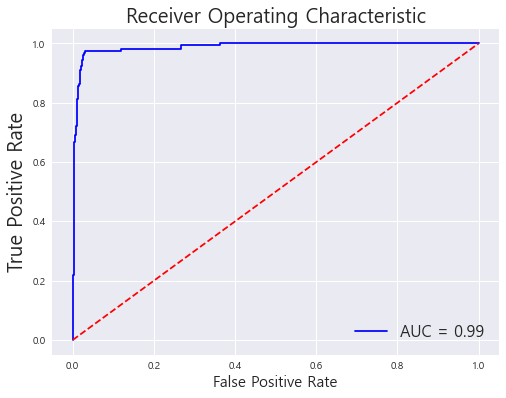

In [49]:
%%time
# GridSearchCV로 구한 최적 하이퍼 파라미터로 설정
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함.
xgb_clf = XGBClassifier(**xgb_cv.best_params_, n_estimators=1000, tree_method = "gpu_hist", objective='binary:logistic',
                    scale_pos_weight= len(y[y==0]) / len(y[y==1]))

# 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200,
            eval_metric="logloss", eval_set=[(X_val, y_val)])

pred = xgb_clf.predict(X_test)

results(X_test, y_test, pred, xgb_clf)

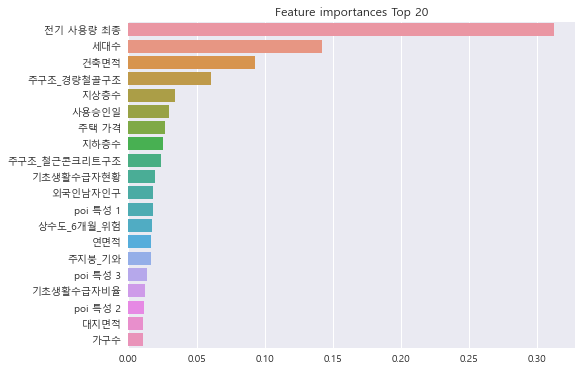

In [50]:
ftr_importances_values = xgb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

[23:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix:
[[698  12]
 [ 10 149]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       710
           1       0.93      0.94      0.93       159

    accuracy                           0.97       869
   macro avg       0.96      0.96      0.96       869
weighted avg       0.97      0.97      0.97       869

Wall time: 127 ms


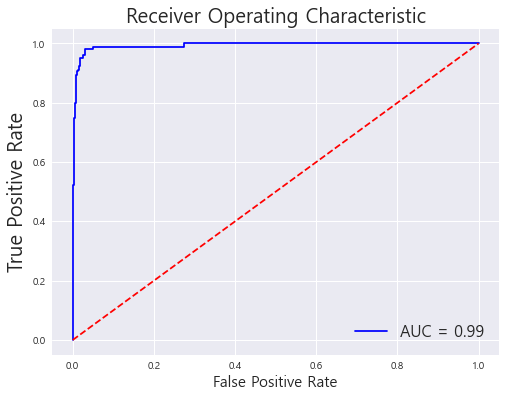

In [51]:
%%time
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(X_train_all, y_train_all)
pred1 = xgb.predict(X_test)
results(X_test, y_test, pred1, xgb)

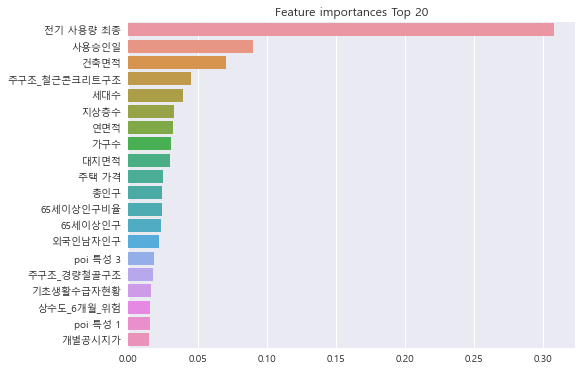

In [52]:
ftr_importances_values = xgb.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# LightGBM

In [34]:
%%time
from lightgbm import LGBMClassifier 
from lightgbm import early_stopping
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier(n_estimators = 200, device_type = "gpu", objective='binary', verbose=-1,
                    scale_pos_weight= len(y[y==0]) / len(y[y==1]))

params={
    'max_depth':[5,6,8],
    'bagging_fraction':[0.1,0.5,0.99],
    'feature_fraction':[0.5,0.75,0.8],
}

es = early_stopping(30)

lgbm_cv = GridSearchCV(lgbm, param_grid = params, cv=5, verbose=1)
lgbm_cv.fit(X_train, y_train, callbacks=[es], eval_metric="binary_logloss", 
           eval_set=[(X_val, y_val)])

print("tuned hpyerparameters :(best parameters) ",lgbm_cv.best_params_)
print("accuracy :",lgbm_cv.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[78]	valid_0's binary_logloss: 0.142759
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[76]	valid_0's binary_logloss: 0.141534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[72]	valid_0's binary_logloss: 0.144001
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[71]	valid_0's binary_logloss: 0.144497
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[69]	valid_0's binary_logloss: 0.142492
Training until va

Early stopping, best iteration is:
[61]	valid_0's binary_logloss: 0.136082
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.141539
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[83]	valid_0's binary_logloss: 0.137831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[100]	valid_0's binary_logloss: 0.142911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.149629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.138884
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.140233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[56]	valid_0

Early stopping, best iteration is:
[46]	valid_0's binary_logloss: 0.136527
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[59]	valid_0's binary_logloss: 0.139901
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[36]	valid_0's binary_logloss: 0.147475
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[58]	valid_0's binary_logloss: 0.150438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[38]	valid_0's binary_logloss: 0.142656
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[62]	valid_0's binary_logloss: 0.141004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.134826
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[34]	valid_0'

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[61]	valid_0's binary_logloss: 0.139501
Confusion Matrix:
[[685  25]
 [  9 150]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       710
           1       0.86      0.94      0.90       159

    accuracy                           0.96       869
   macro avg       0.92      0.95      0.94       869
weighted avg       0.96      0.96      0.96       869

Wall time: 820 ms


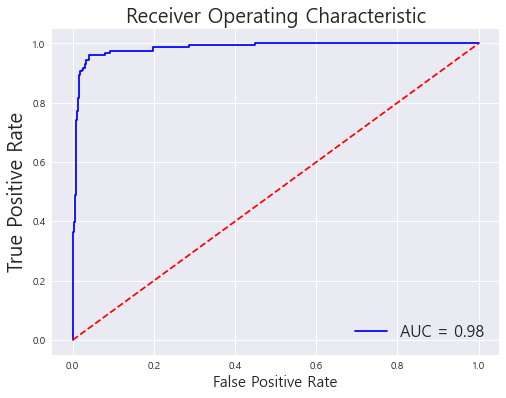

In [35]:
%%time
# GridSearchCV로 구한 최적 하이퍼 파라미터로 설정
# n_estimators는 1000으로 증가
lgbm_clf = LGBMClassifier(**lgbm_cv.best_params_, n_estimators=1000, device_type = "gpu", objective='binary', verbose=-1,
                    scale_pos_weight= len(y[y==0]) / len(y[y==1]))

es = early_stopping(200)

# 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
lgbm_clf.fit(X_train, y_train, callbacks=[es],
            eval_metric="binary_logloss", eval_set=[(X_val, y_val)])

pred = lgbm_clf.predict(X_test)

results(X_test, y_test, pred, lgbm_clf)

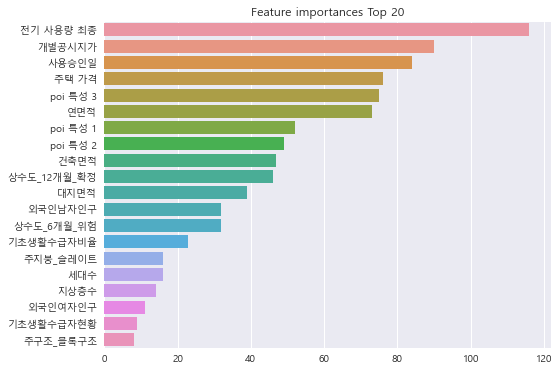

In [36]:
ftr_importances_values = lgbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y=ftr_top20.index)
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 372, number of negative: 1655
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3204
[LightGBM] [Info] Number of data points in the train set: 2027, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.183522 -> initscore=-1.492662
[LightGBM] [Info] Start training from score -1.492662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Confusion Matrix:
[[698  12]
 [ 11 148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       710
           1       0.93      0.93      0.93       159

    accuracy                           0.97     

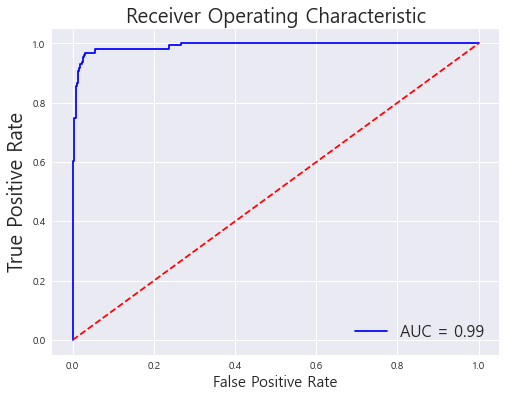

In [37]:
%%time
lgbm = LGBMClassifier(objective='binary')
lgbm.fit(X_train_all, y_train_all)
pred1 = lgbm.predict(X_test)
results(X_test, y_test, pred1, lgbm)

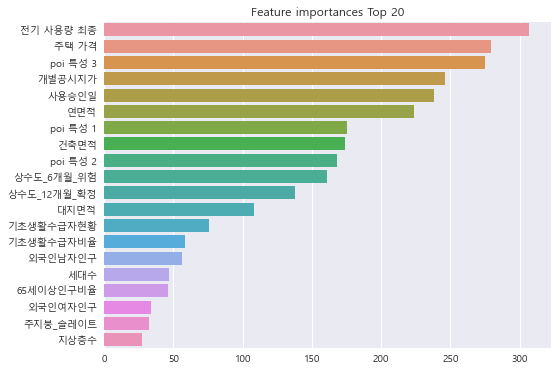

In [38]:
ftr_importances_values = lgbm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y=ftr_top20.index)
plt.show()